In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [3]:
df=pd.read_csv('weather.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [10]:
df.shape

(145460, 23)

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
data=df[df['RainTomorrow'].isnull()==False]
data
df=data

In [153]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [5]:
#Random values Imputation for null values
def randomimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [6]:
randomimputation(df, "Cloud9am")
randomimputation(df, "Cloud3pm")
randomimputation(df, "Evaporation")
randomimputation(df, "Sunshine")

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\3234260662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable]=df[variable]


Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


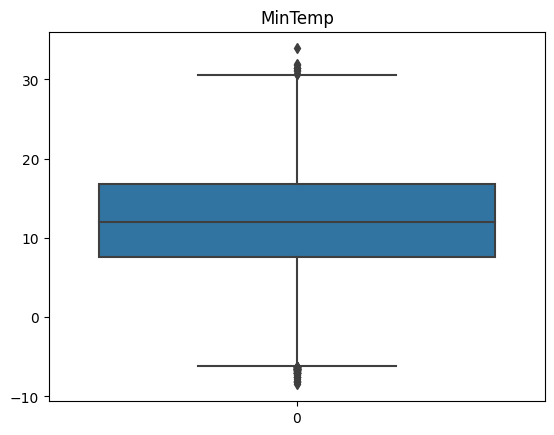

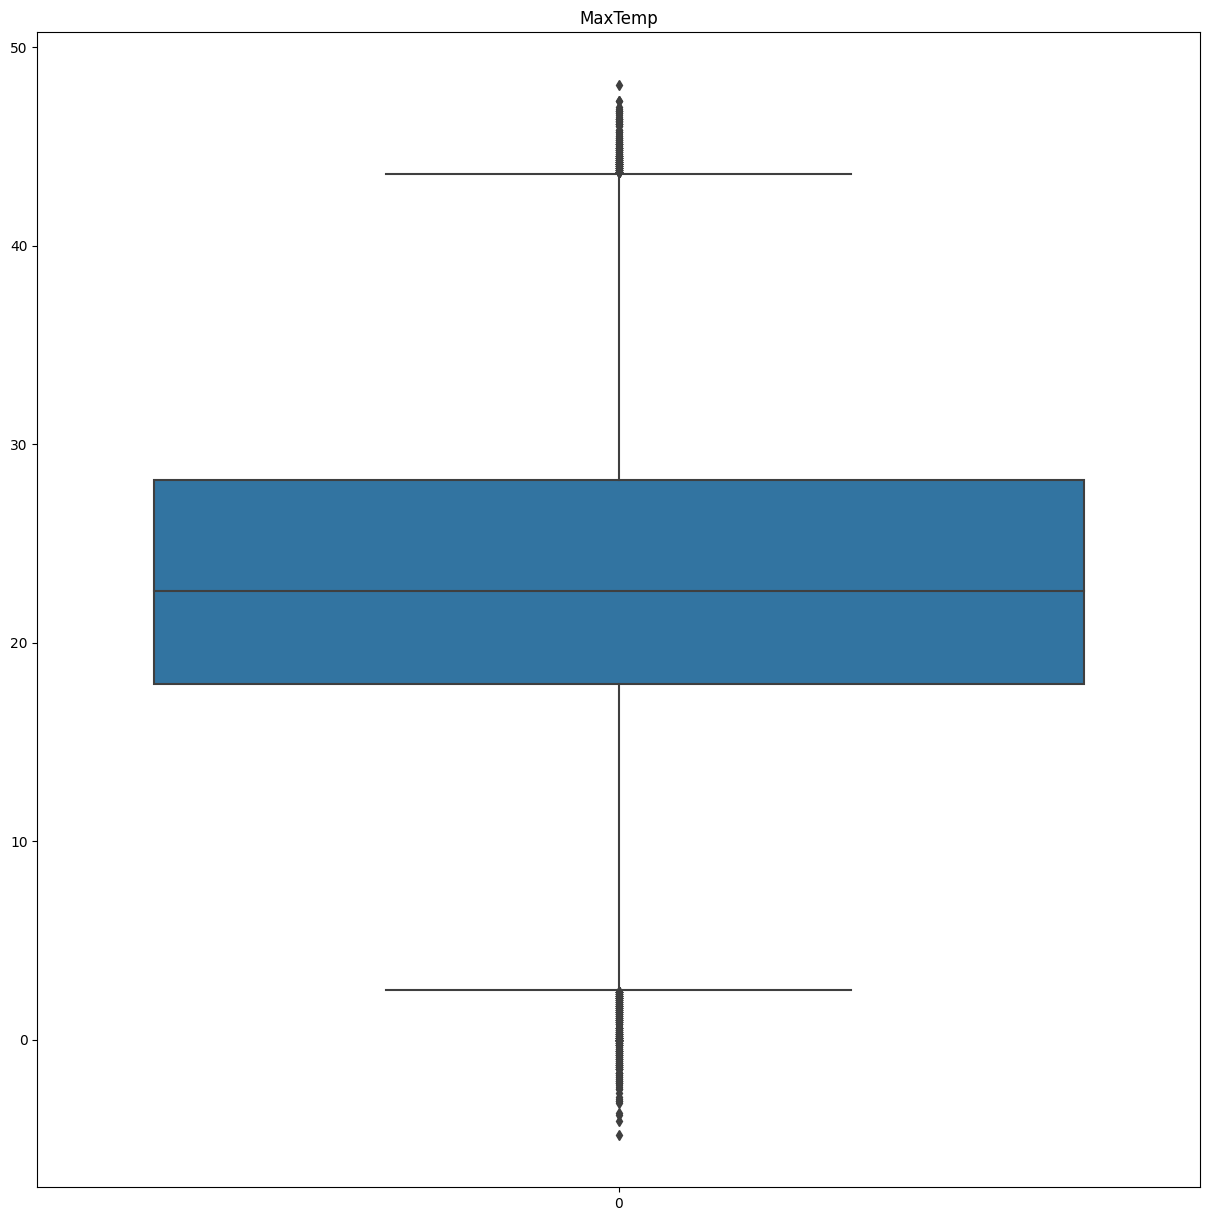

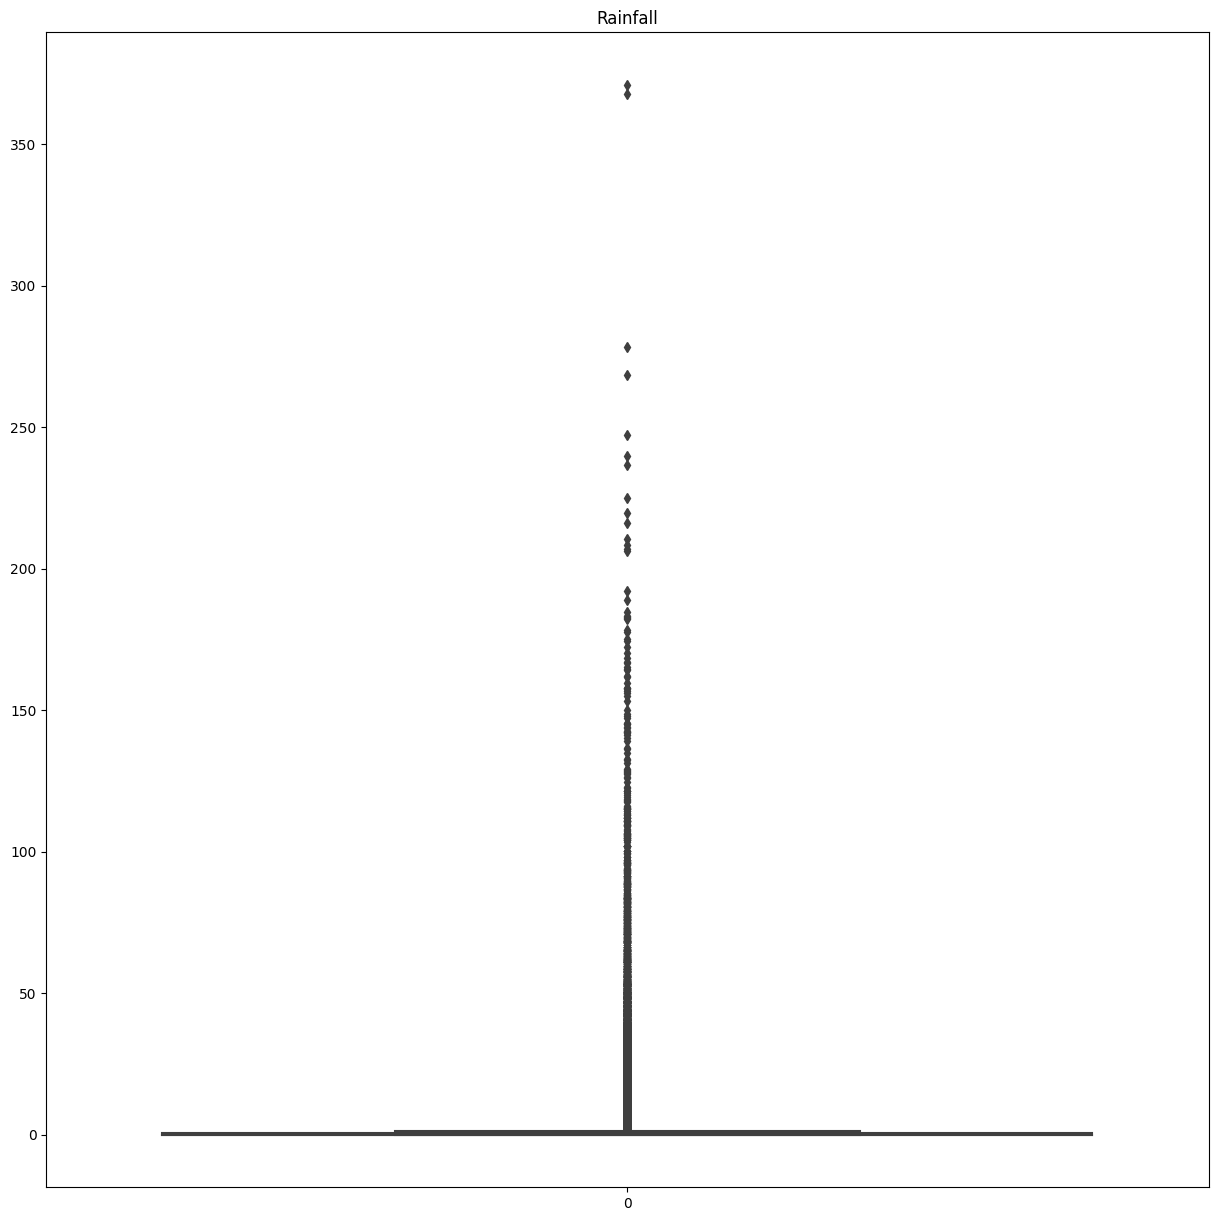

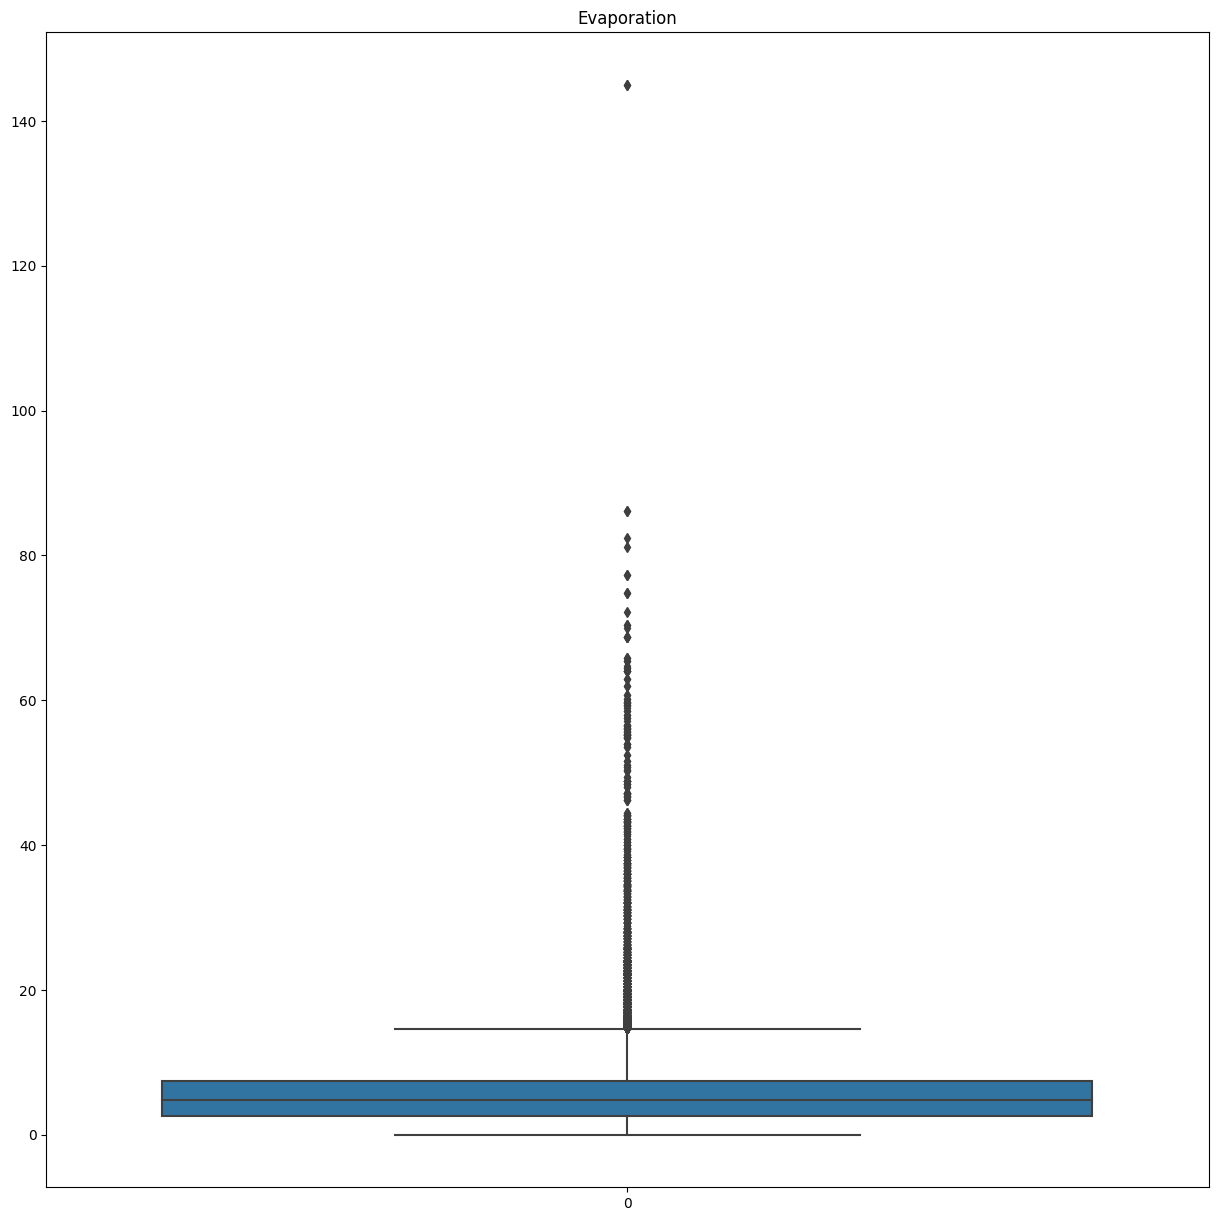

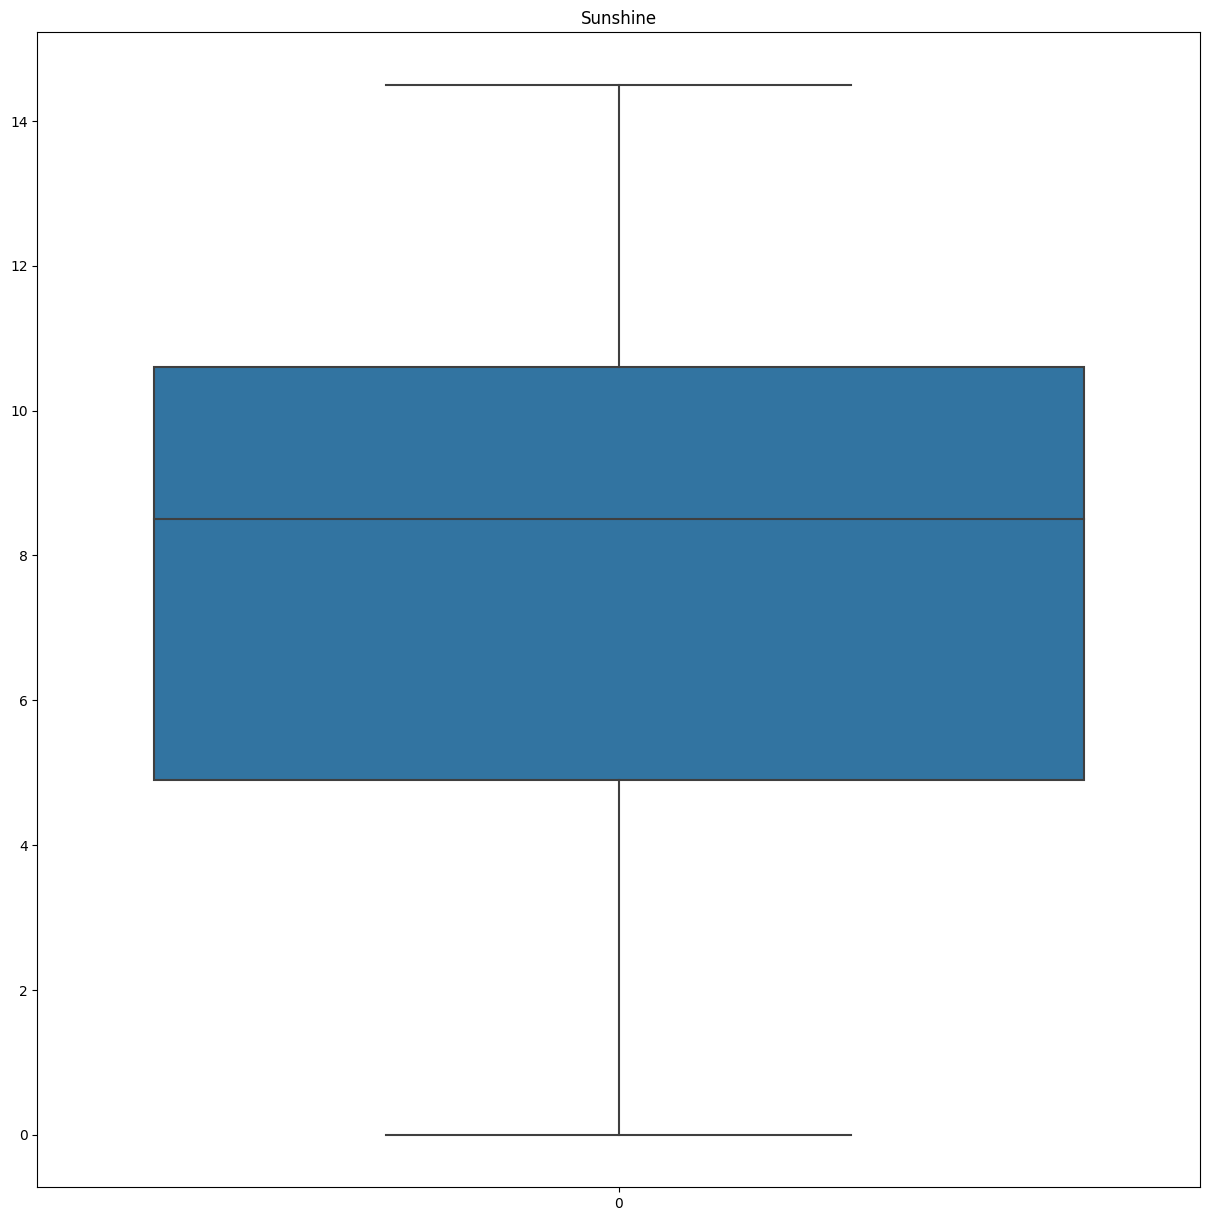

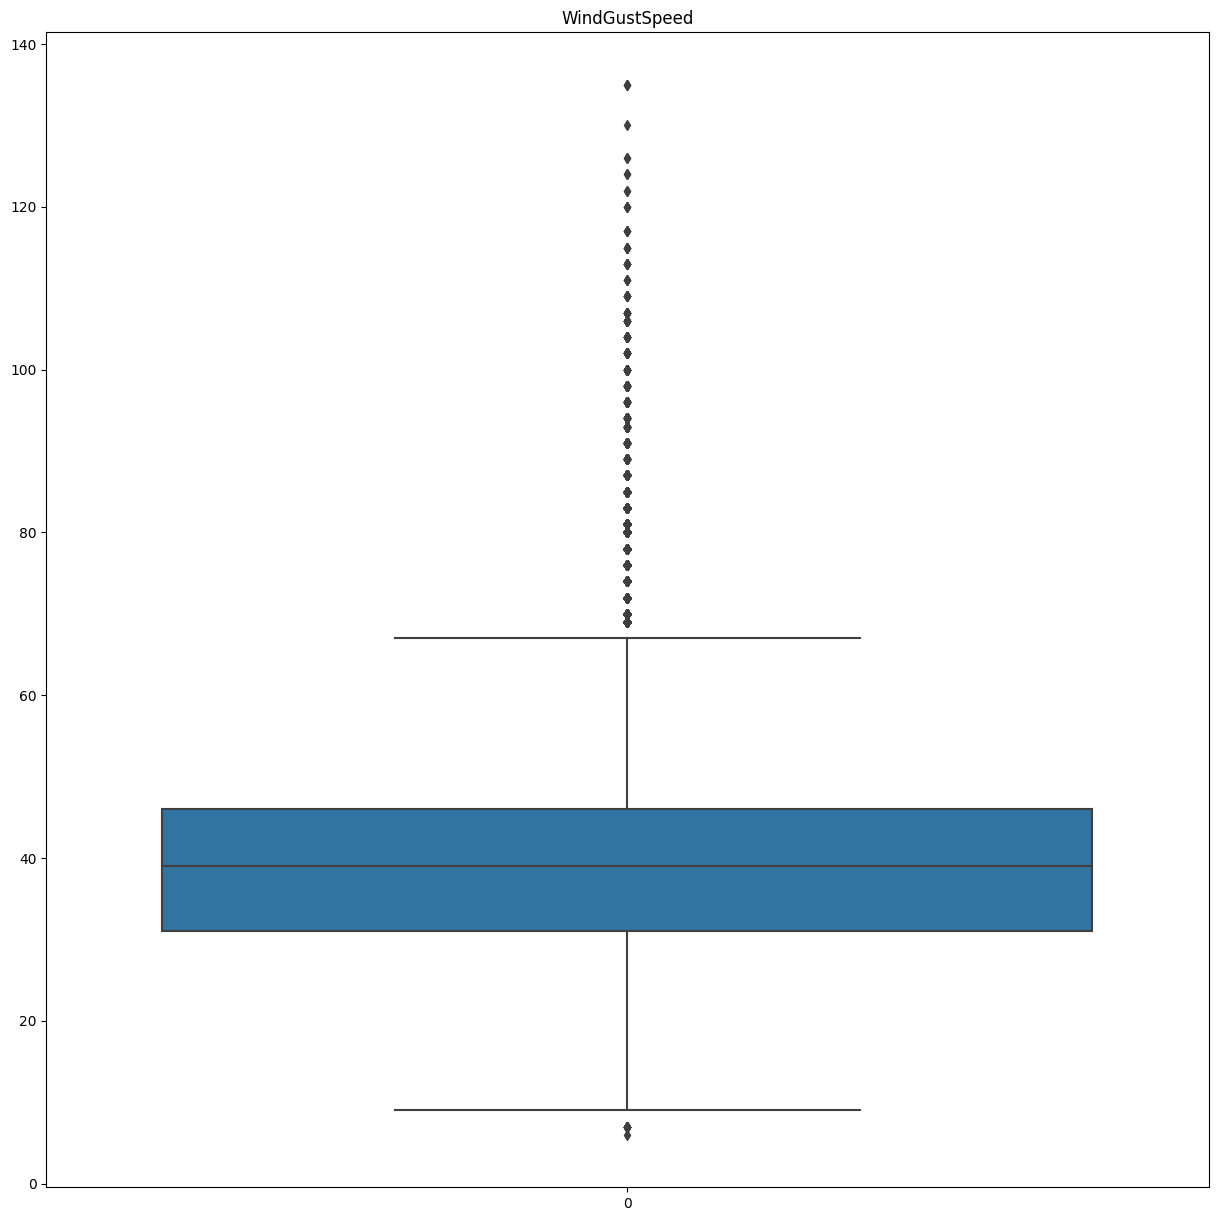

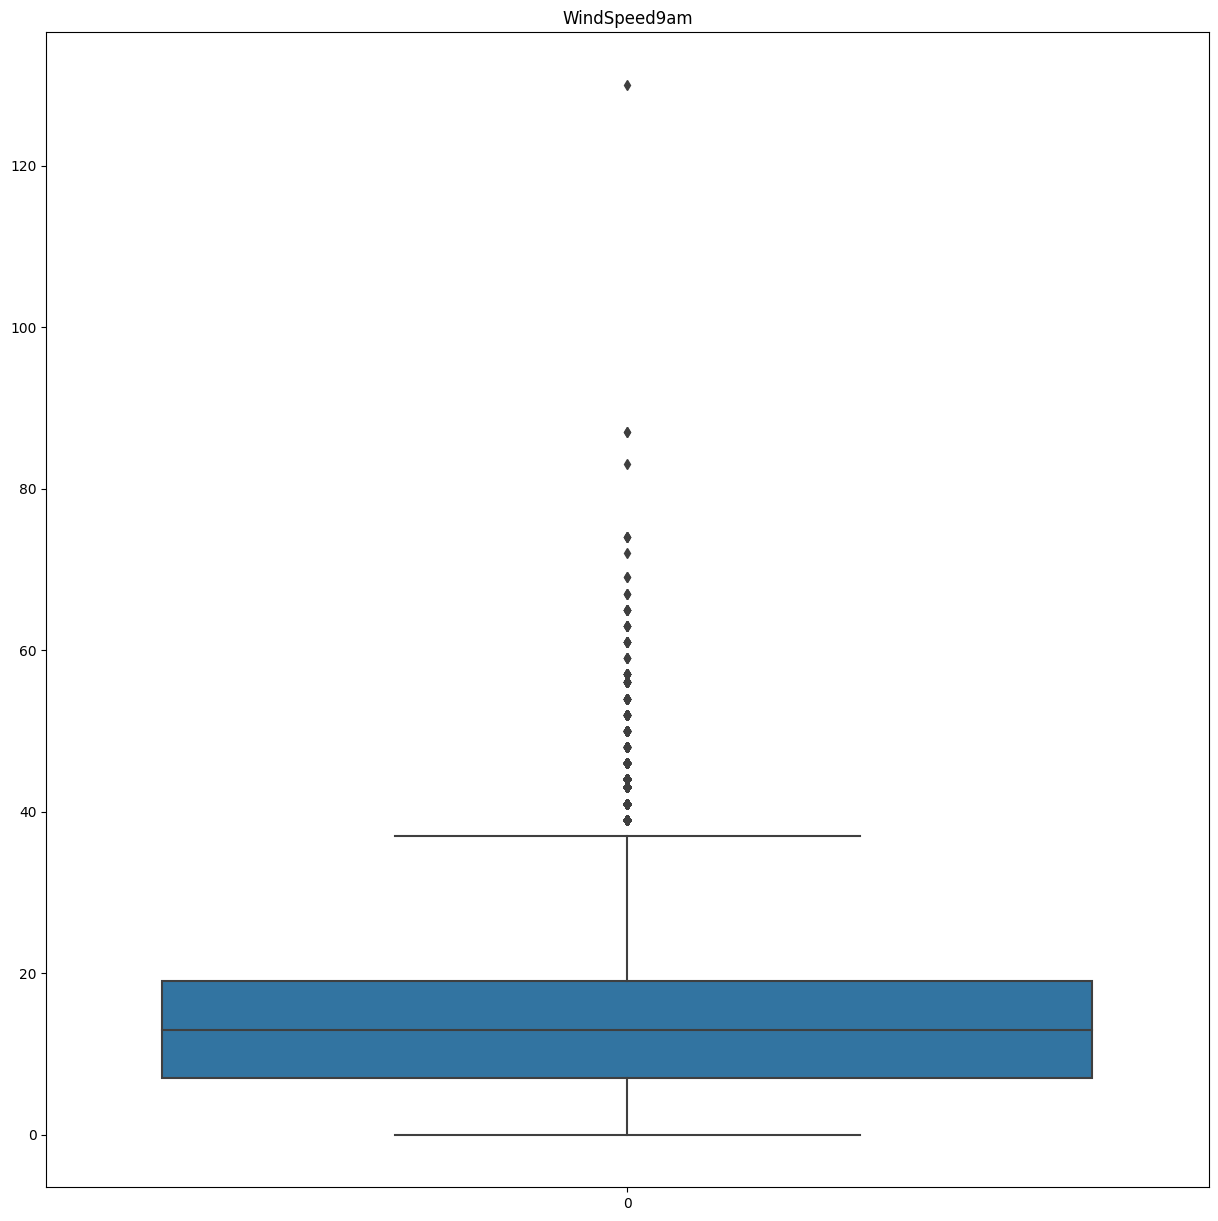

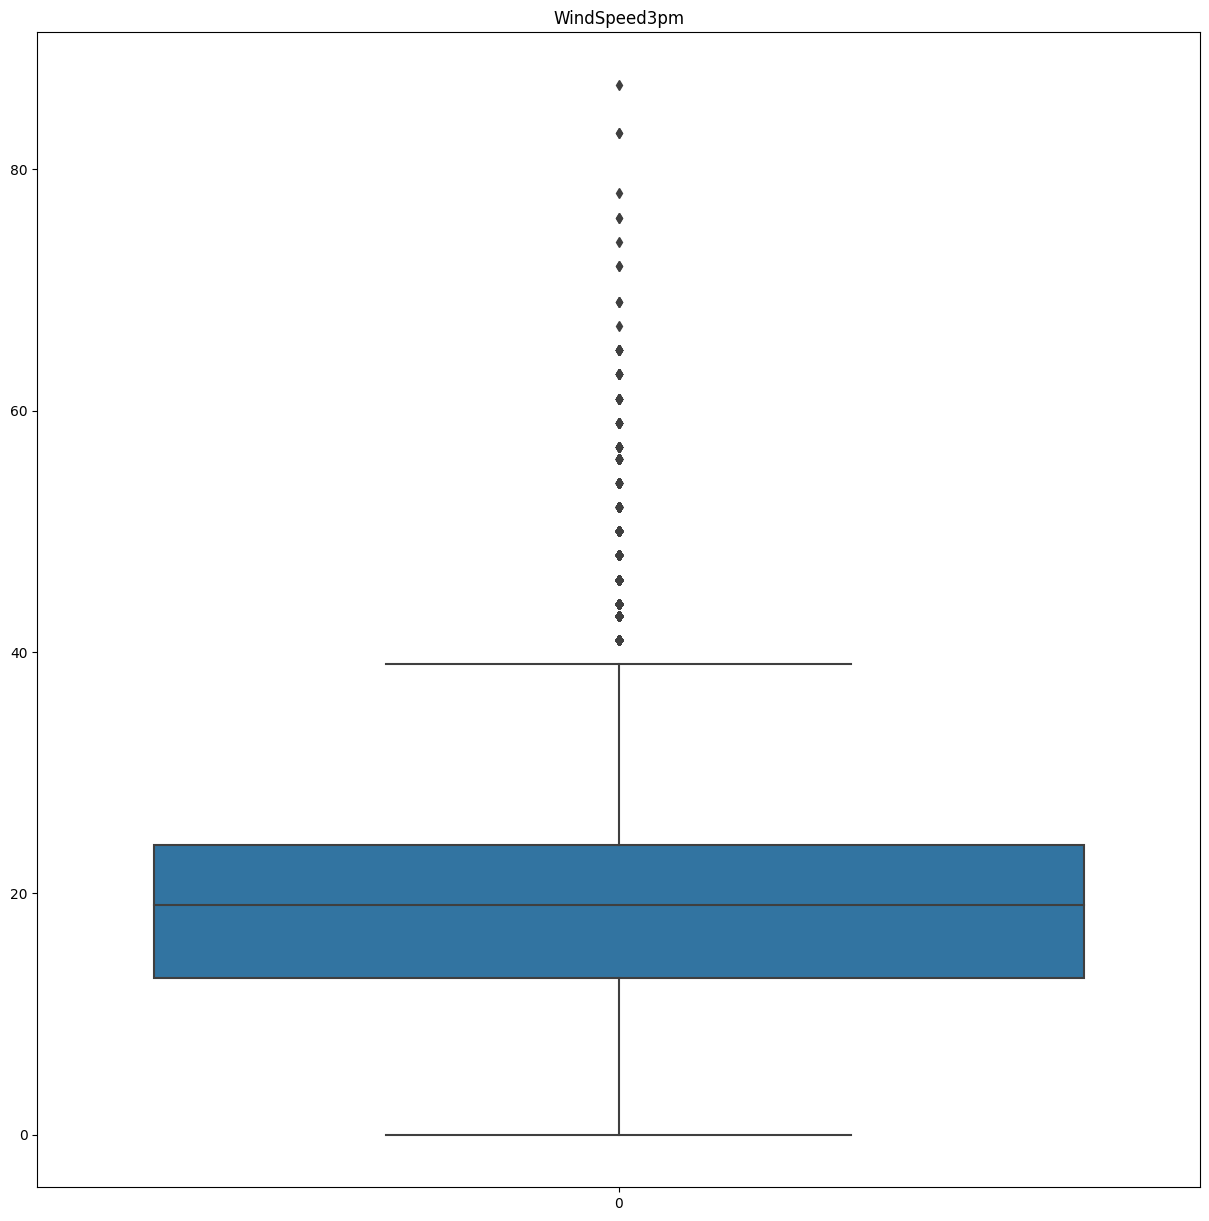

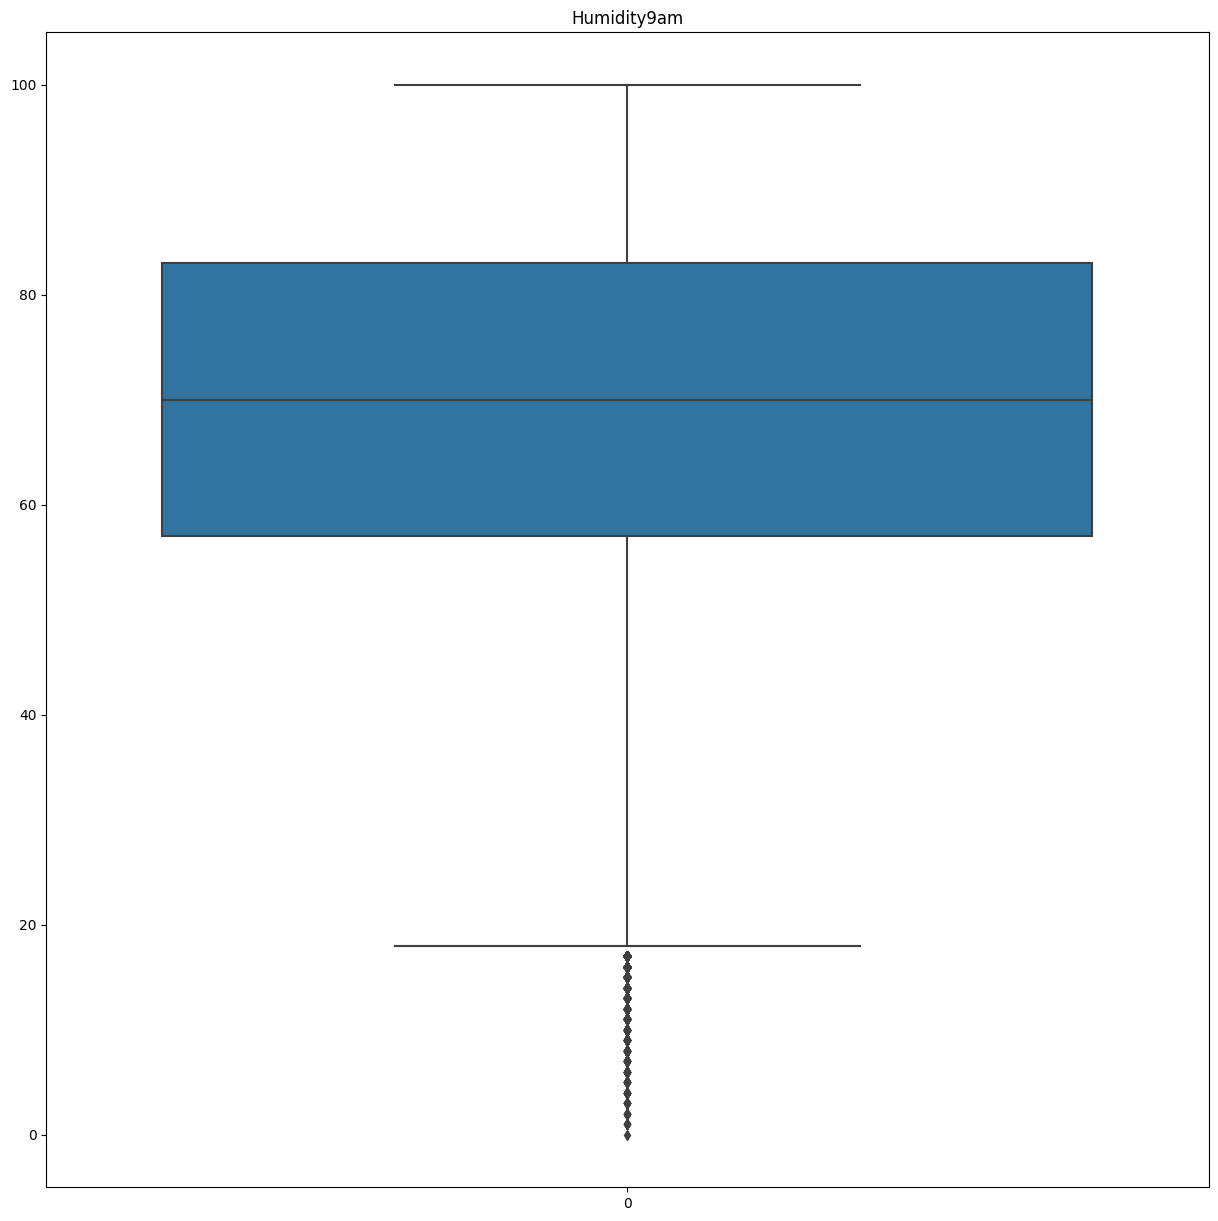

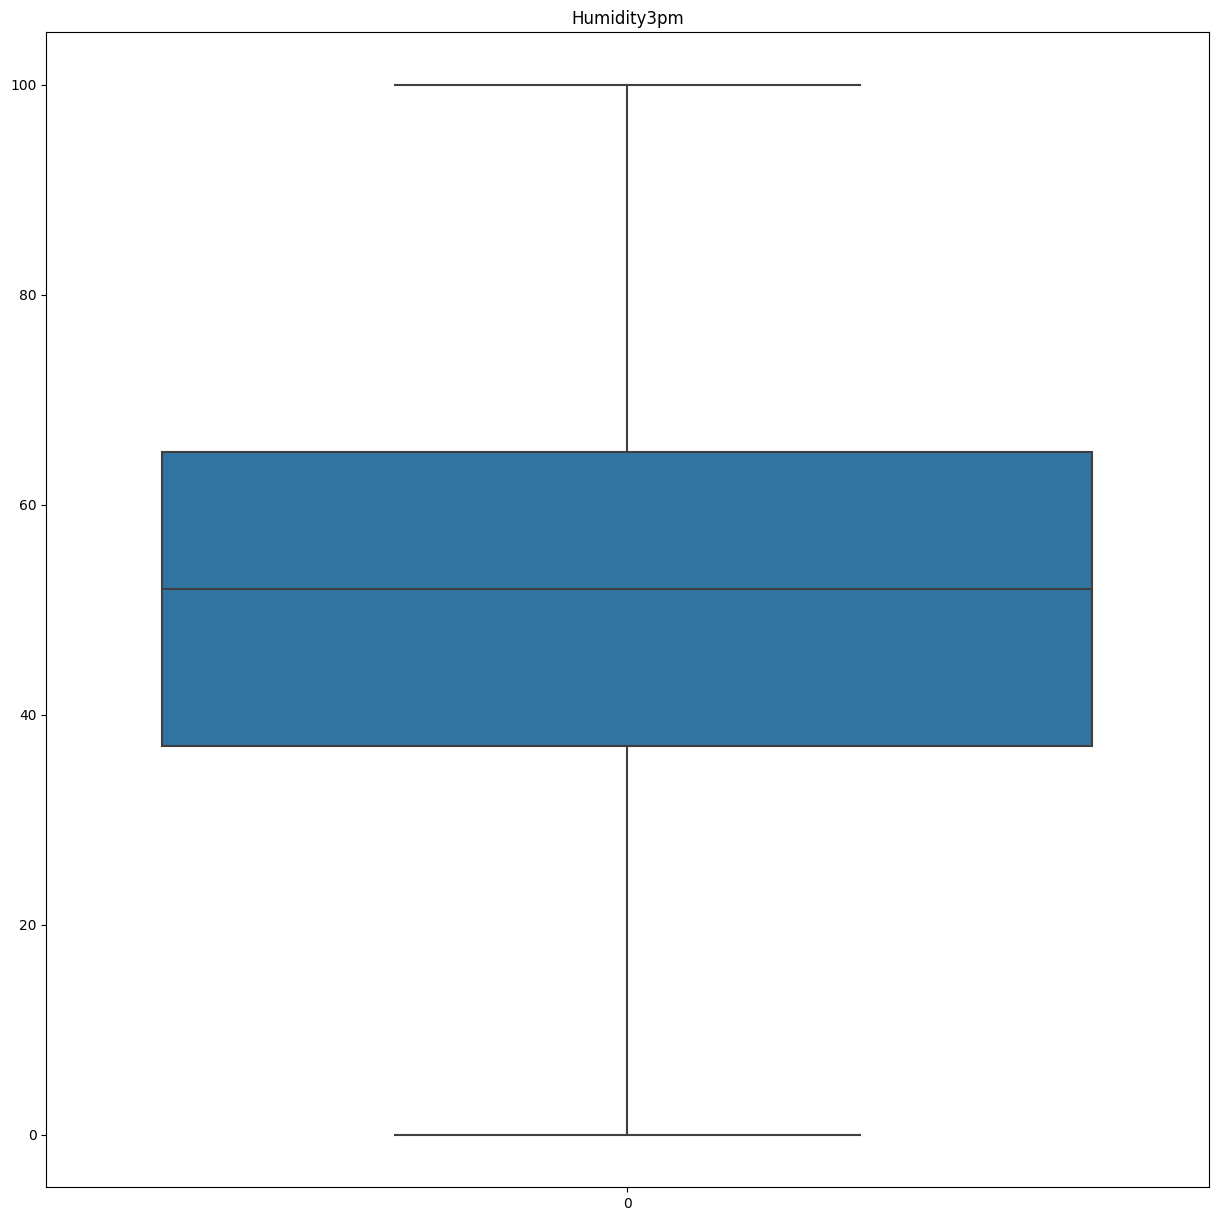

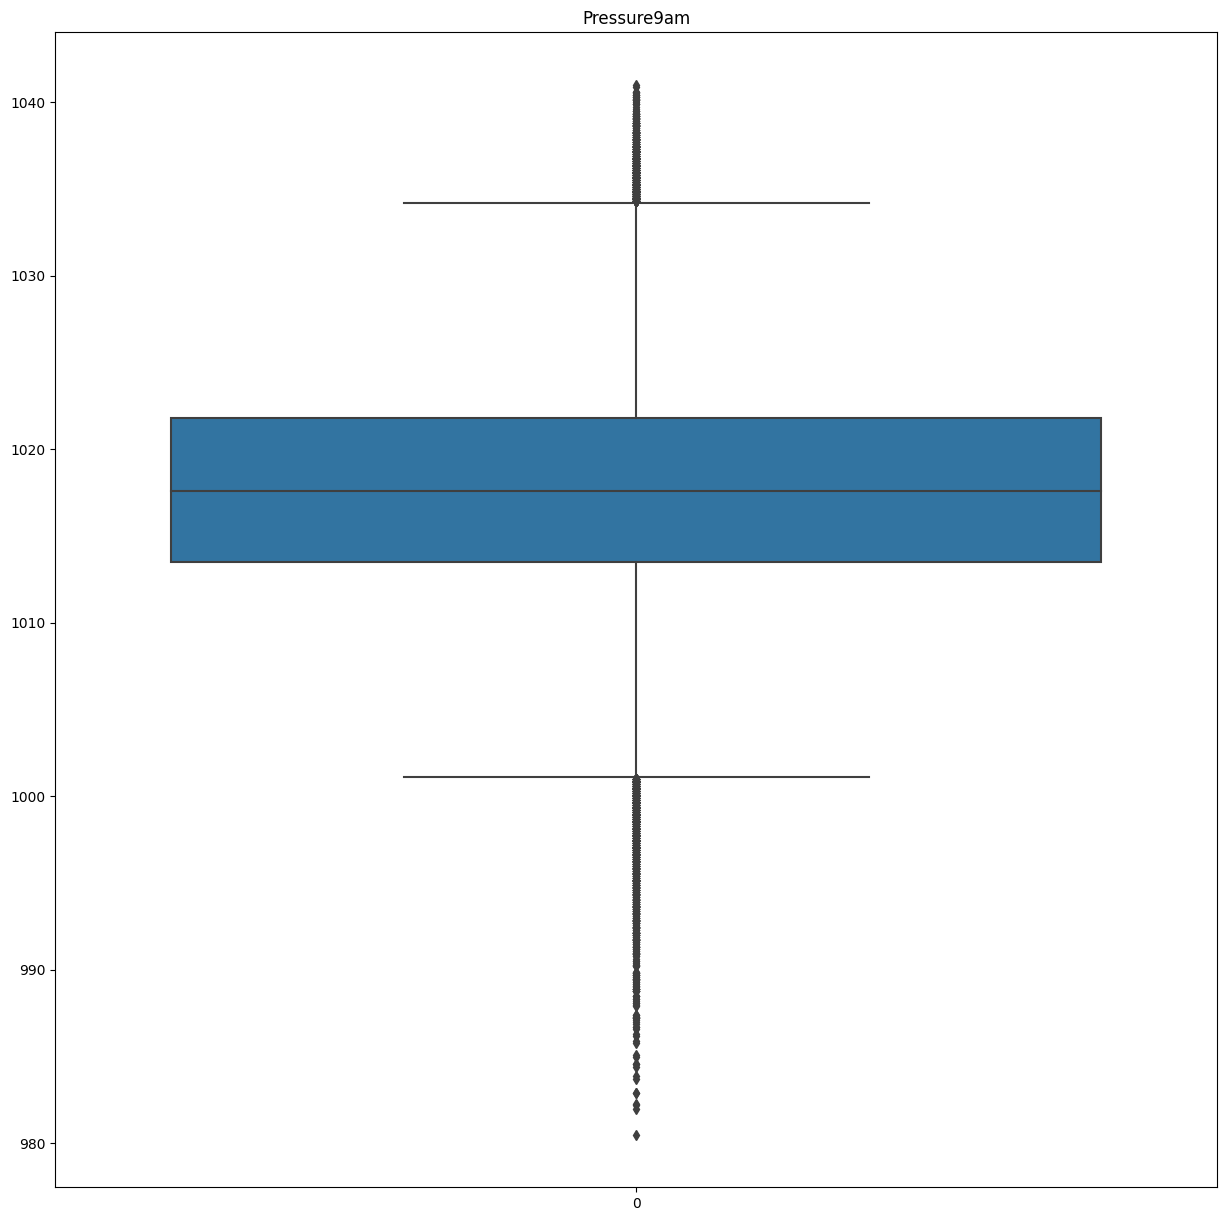

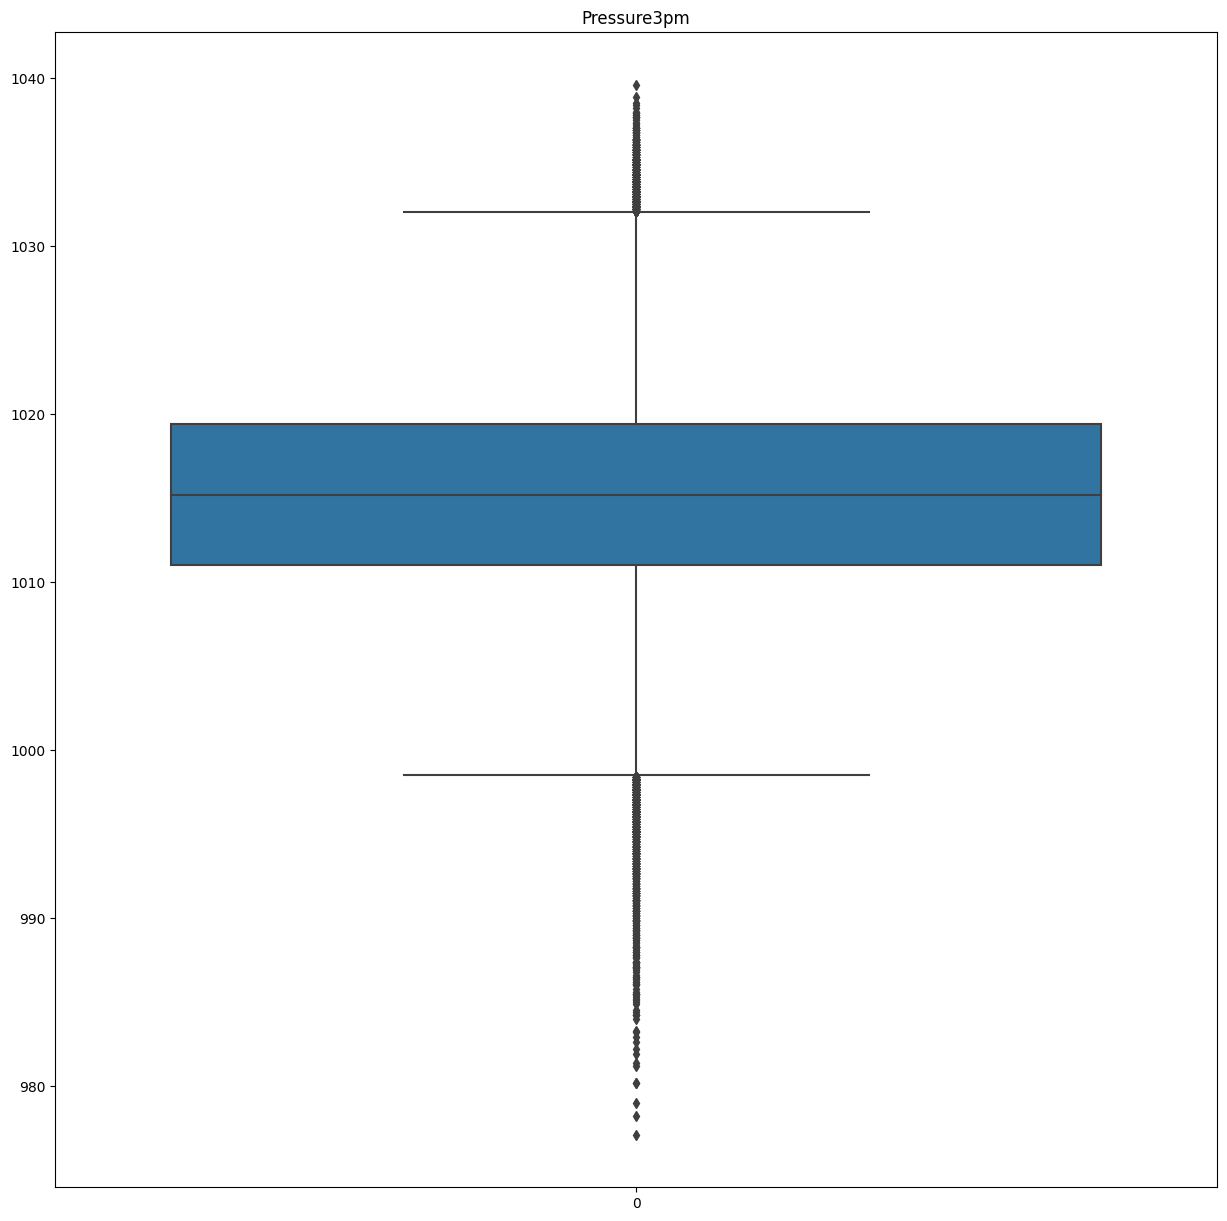

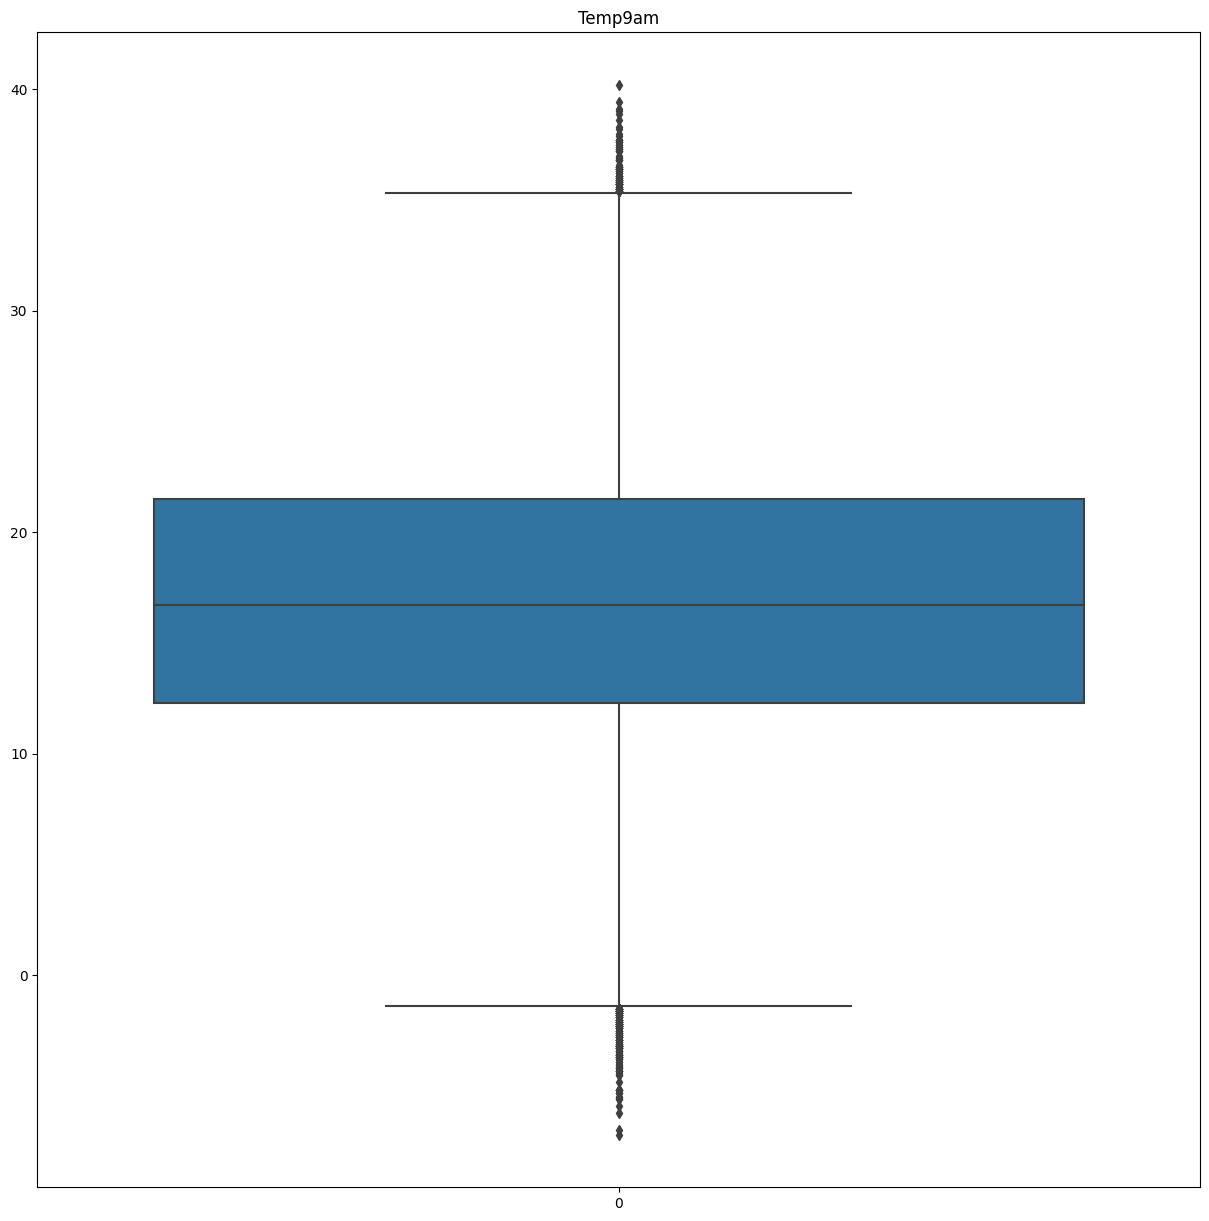

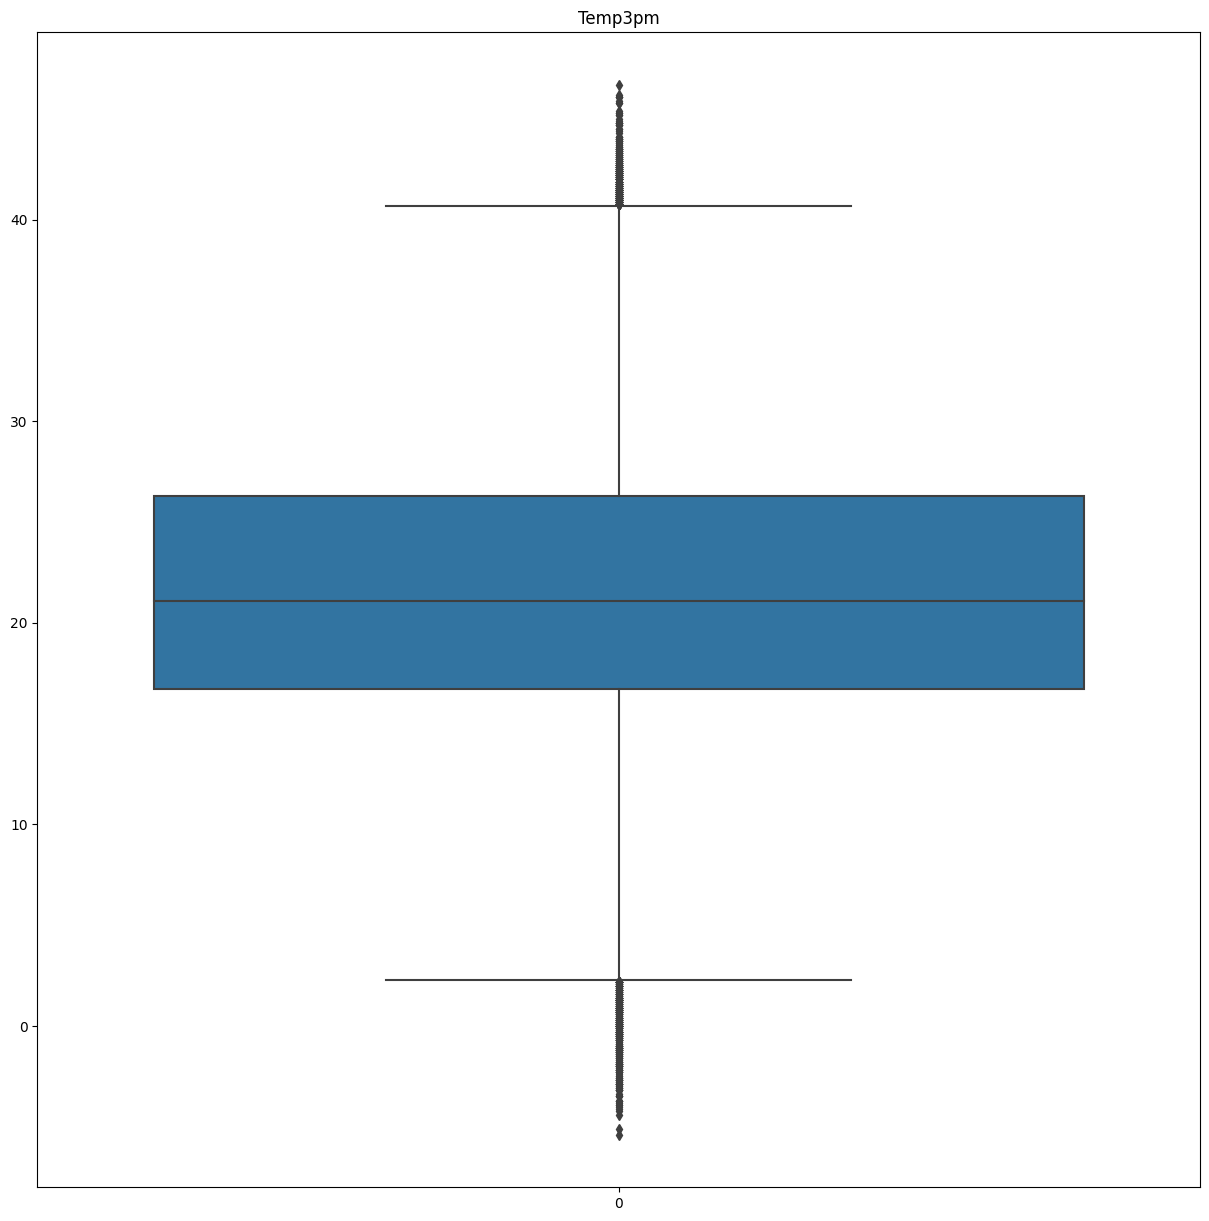

<Figure size 1500x1500 with 0 Axes>

In [21]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# HANDLING OUTLIERS

In [22]:
#Handling all the outliers present in the dataset
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-6.200000000000001 30.6


In [23]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [24]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999975 43.65


In [25]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [26]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [27]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [28]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.600000000000001 14.600000000000001


In [29]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [30]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [31]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [32]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [33]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [34]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [35]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [36]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [37]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [38]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [39]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05   

In [40]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.4000000000001 1032.0


In [41]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [42]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [43]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [44]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.299999999999997 40.7


In [45]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

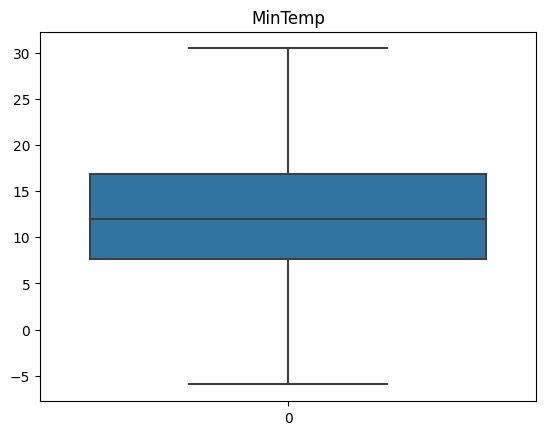

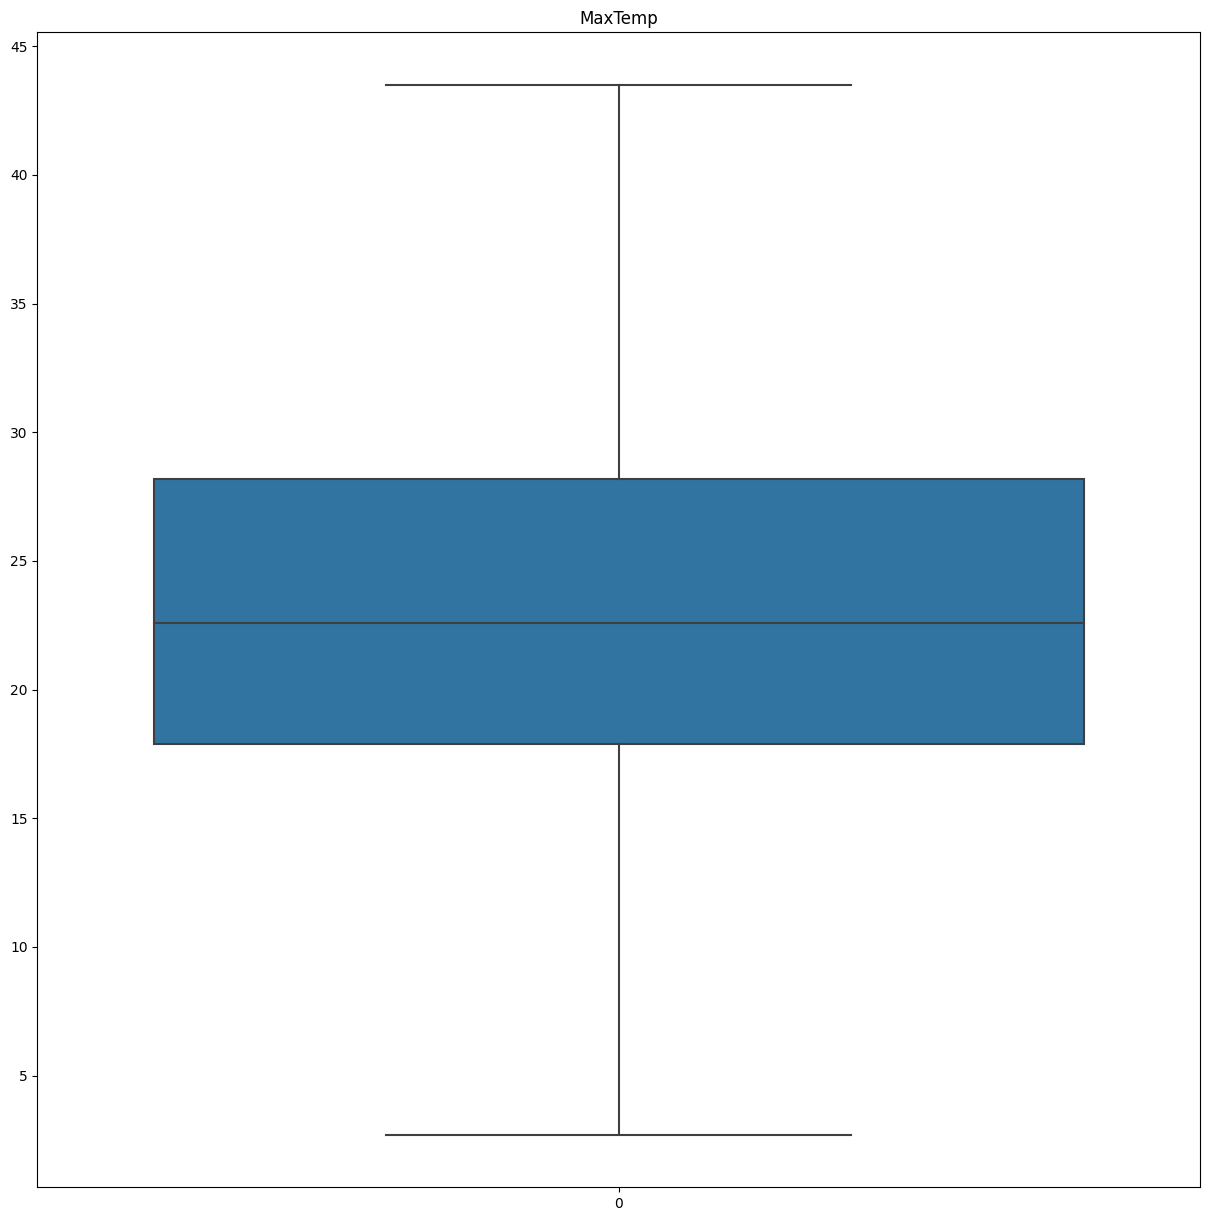

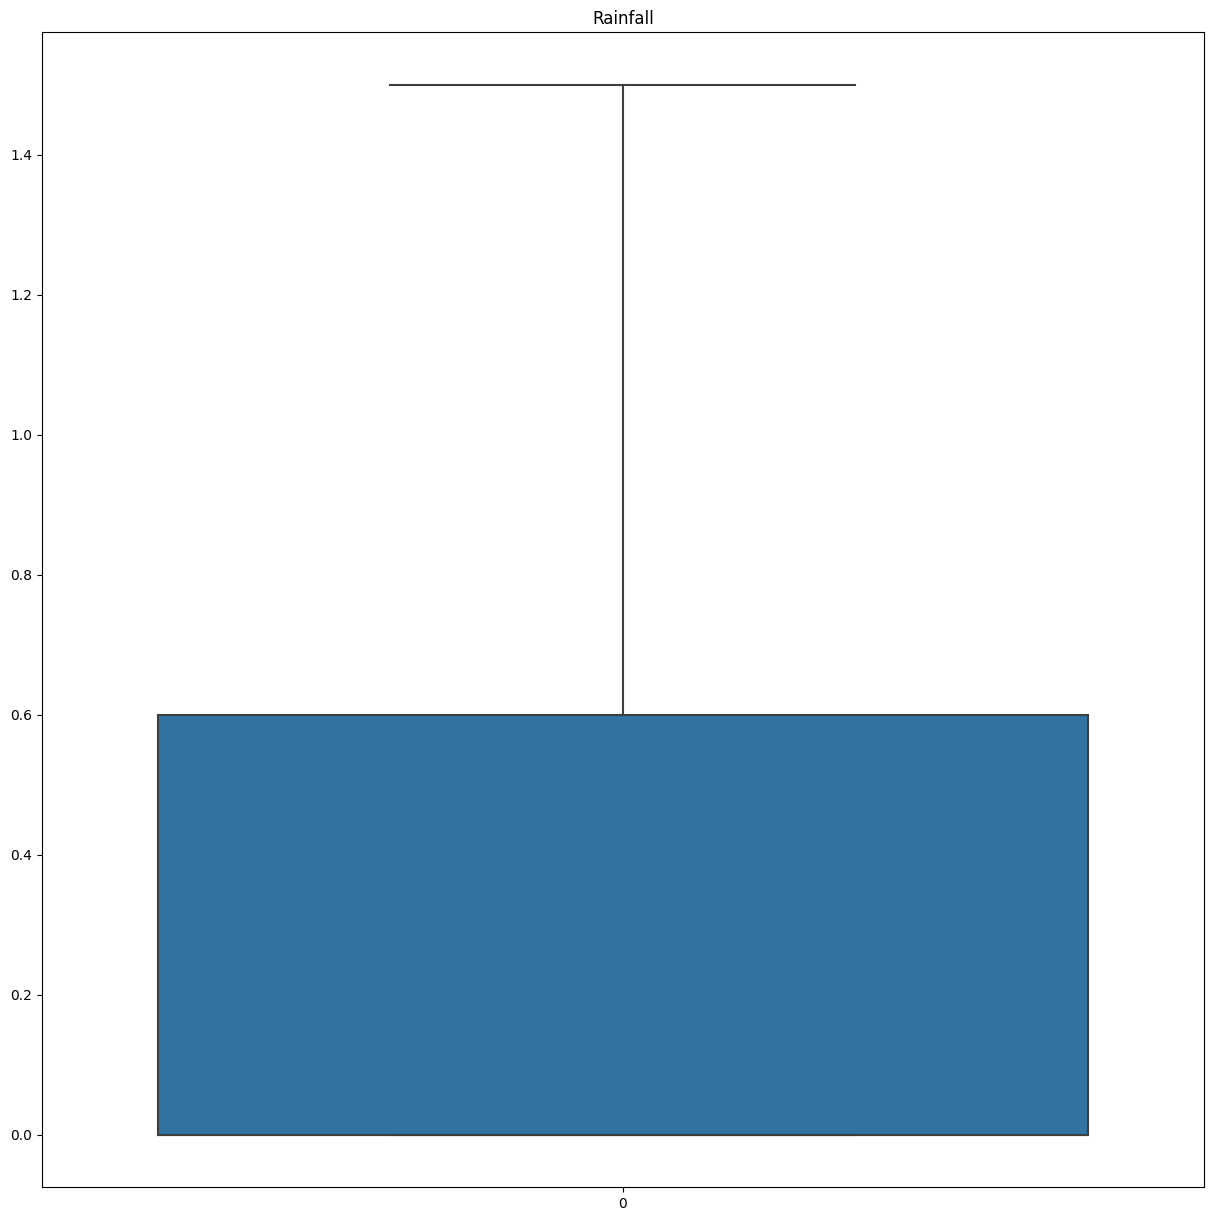

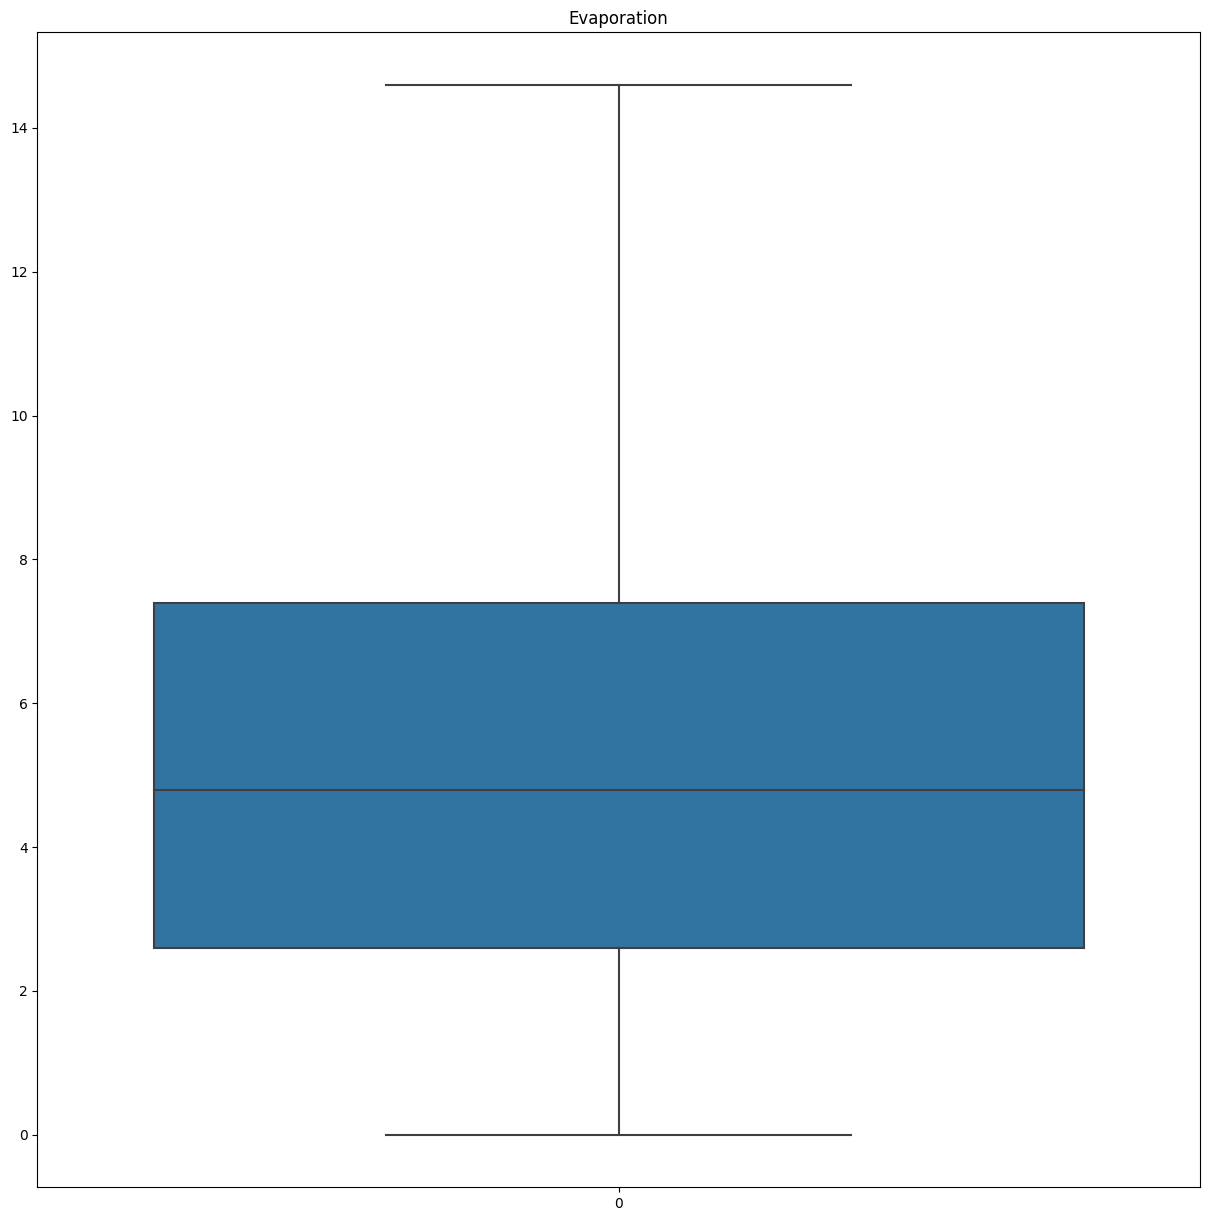

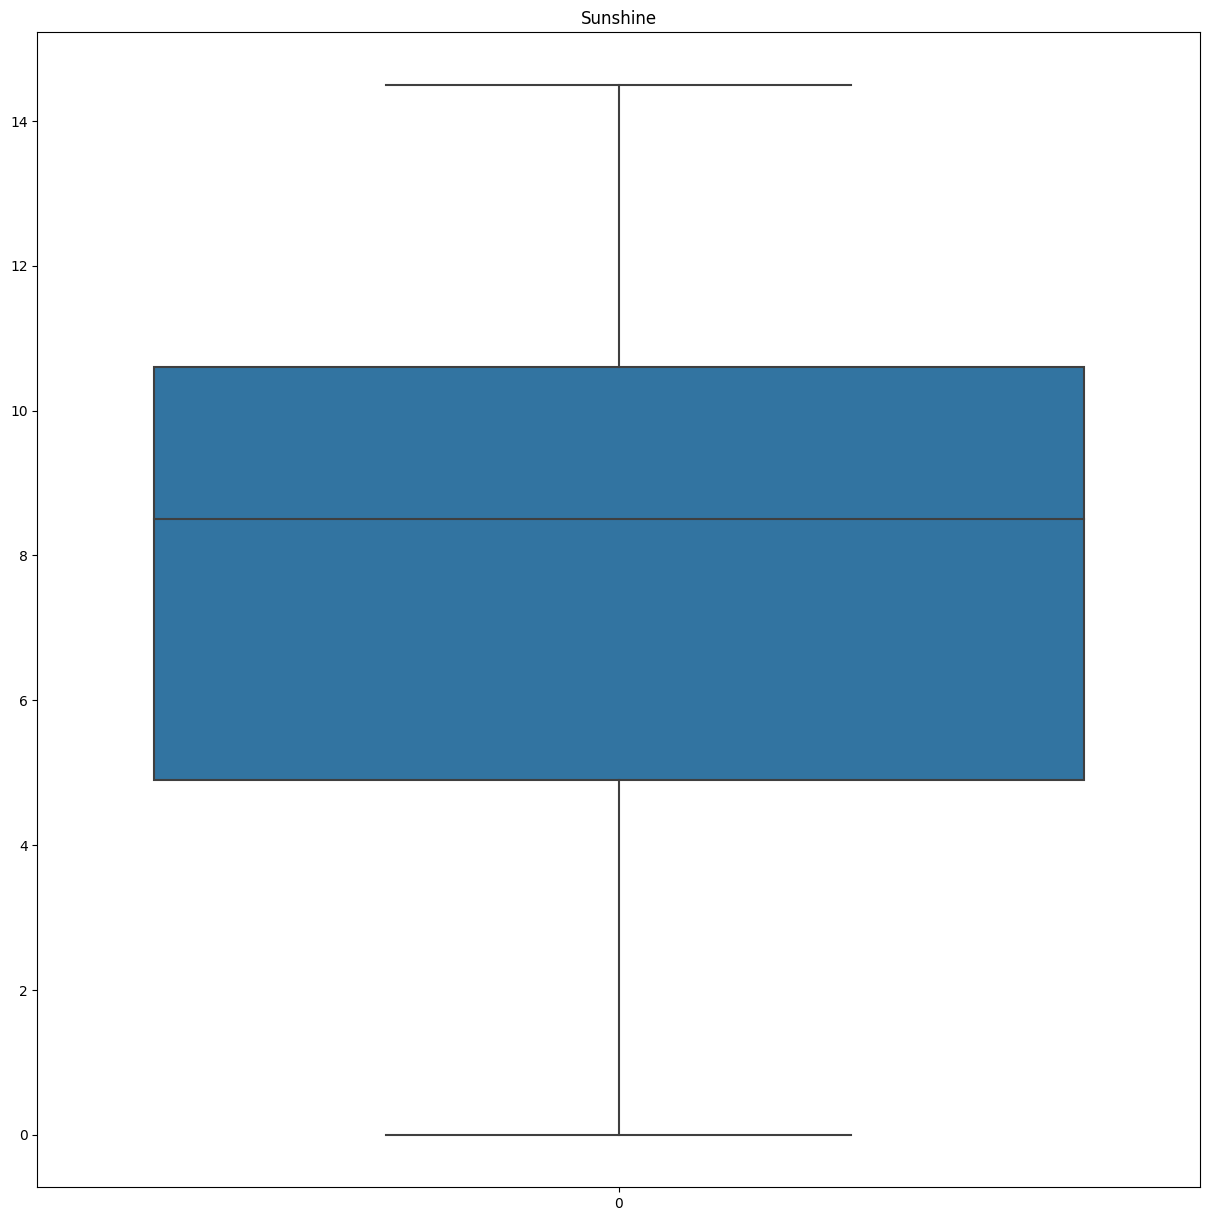

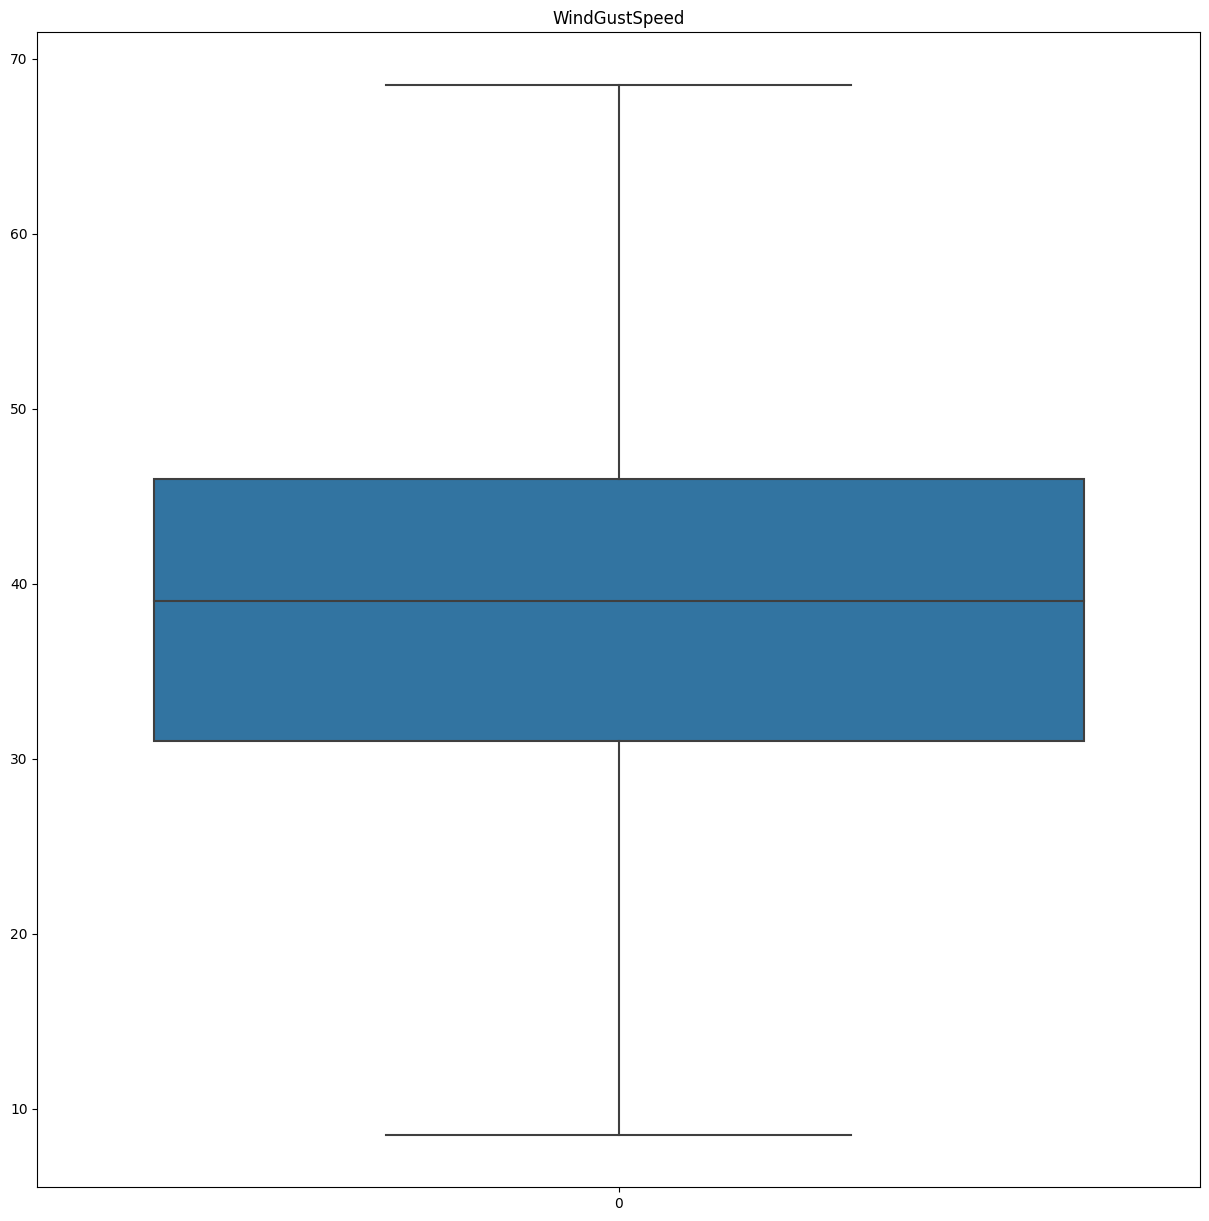

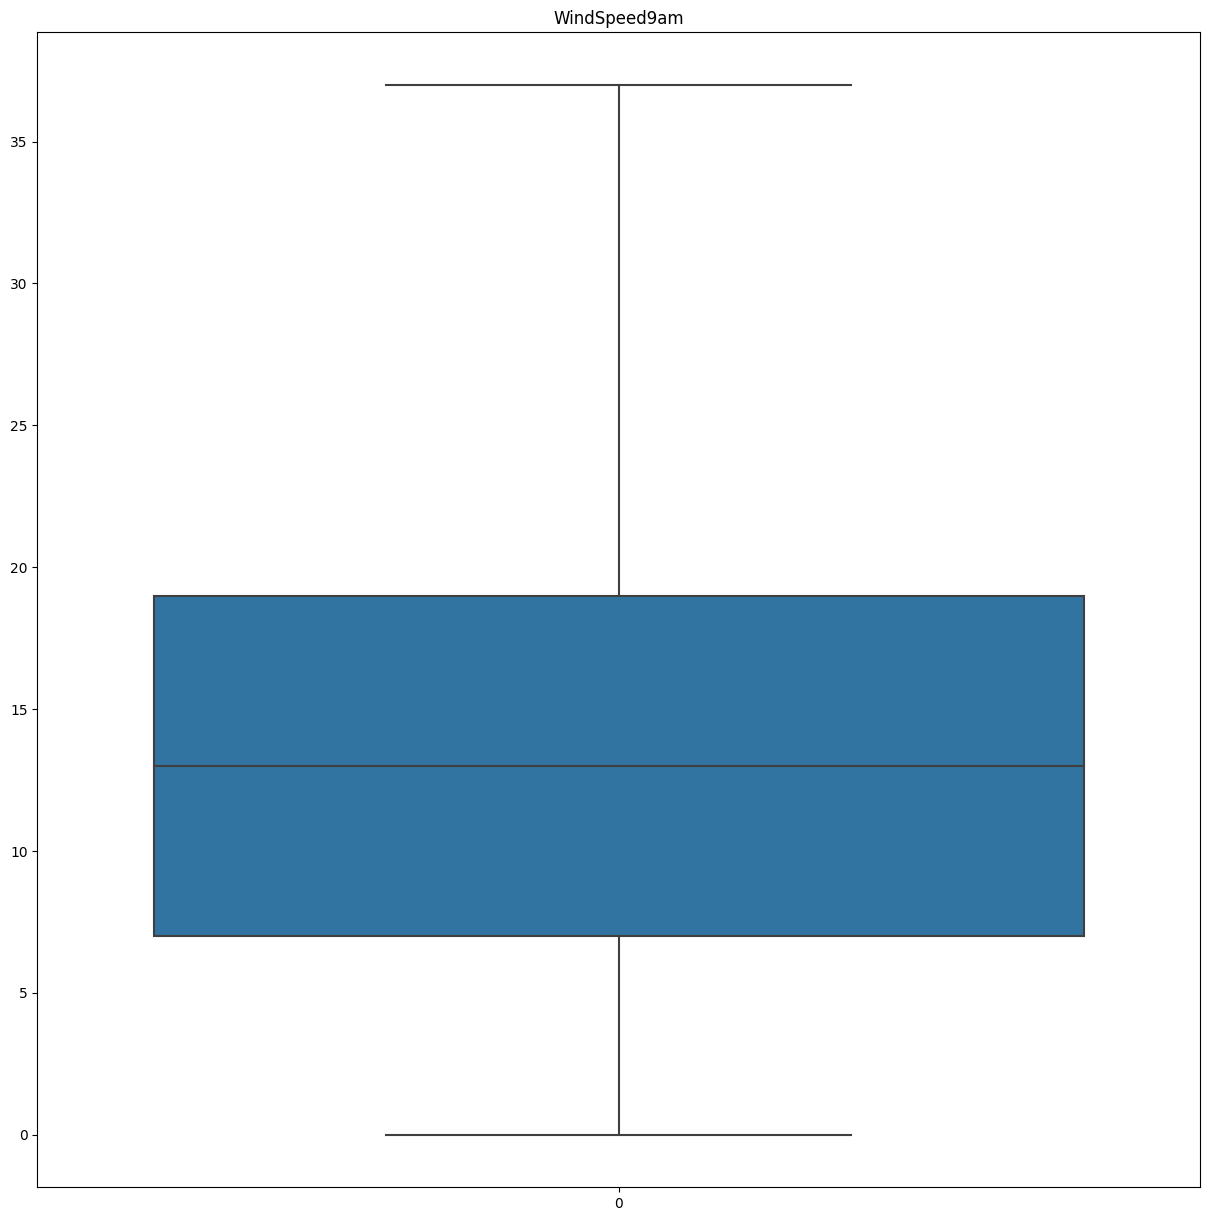

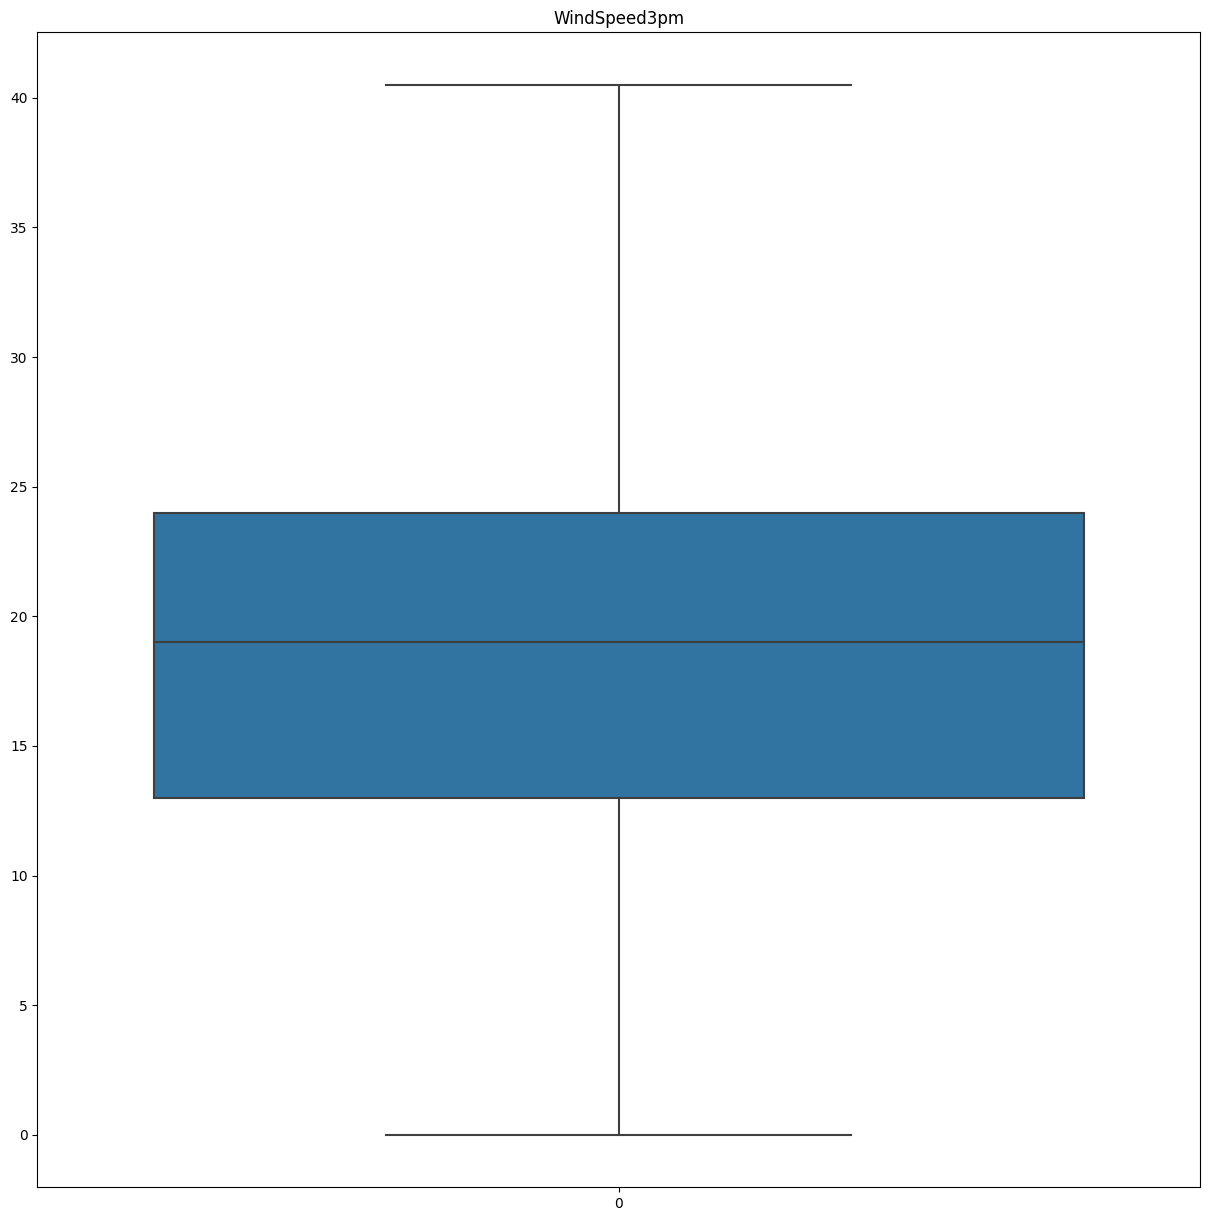

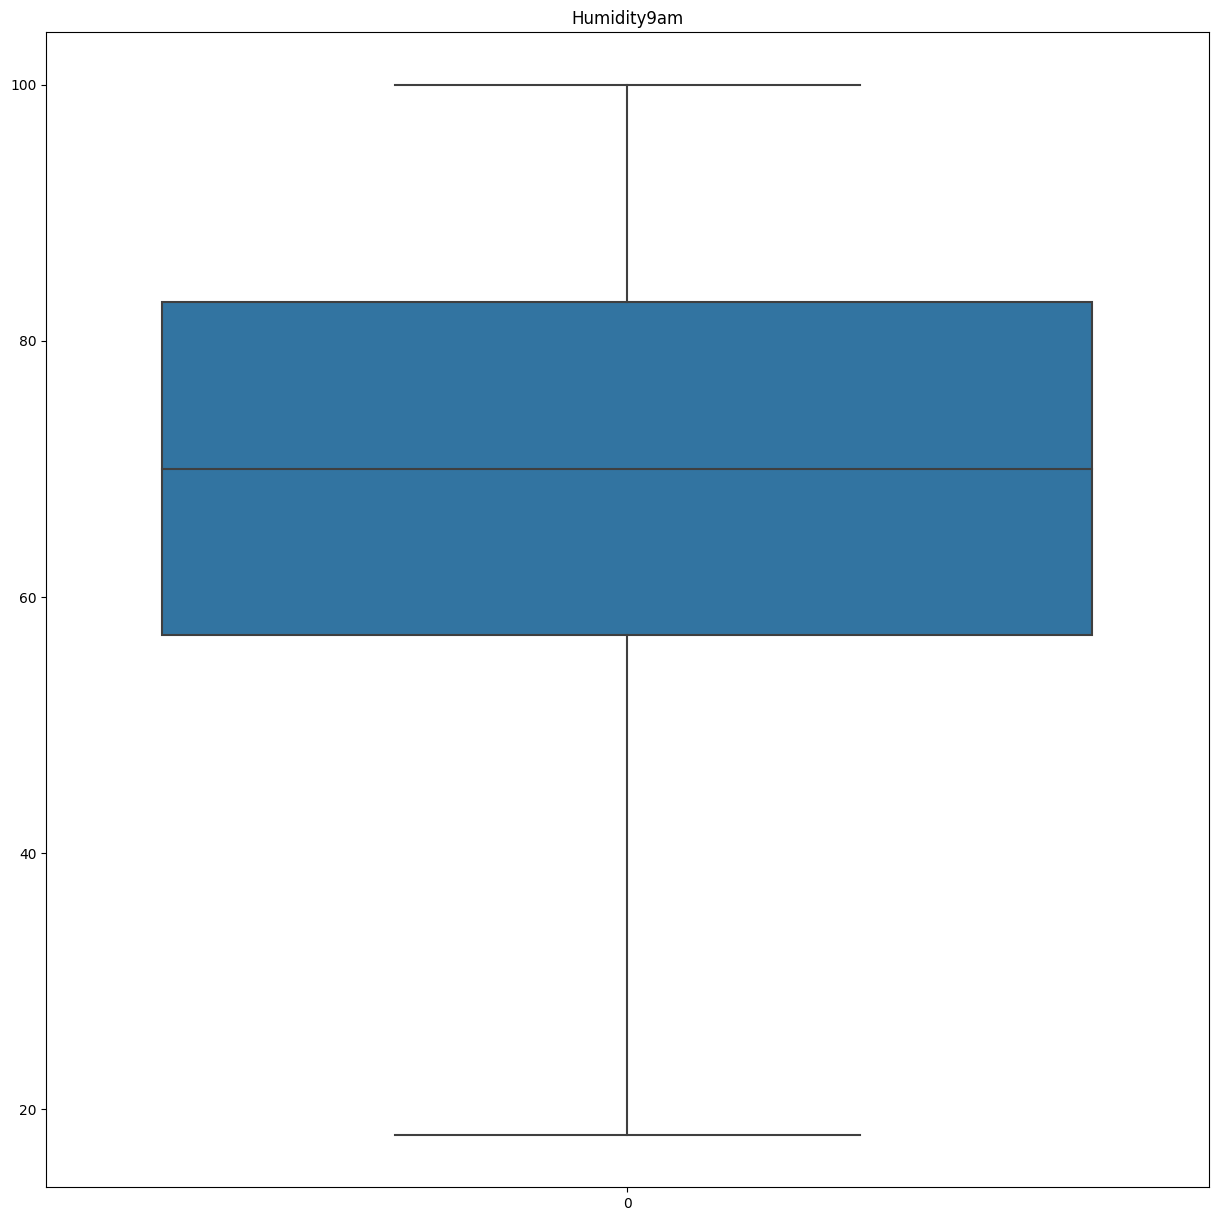

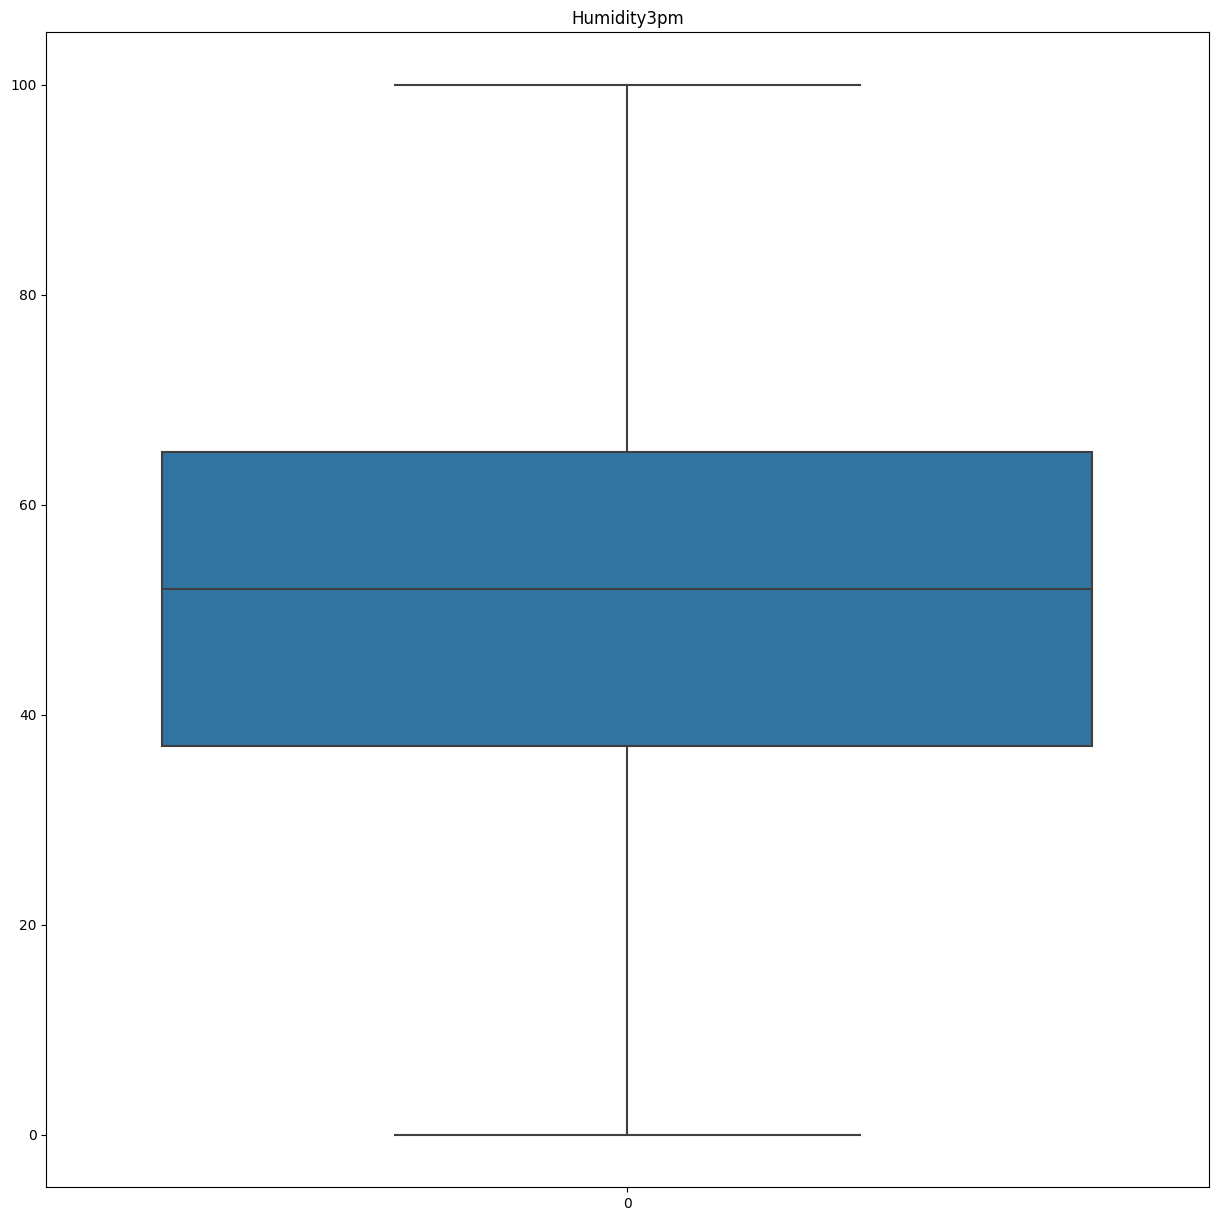

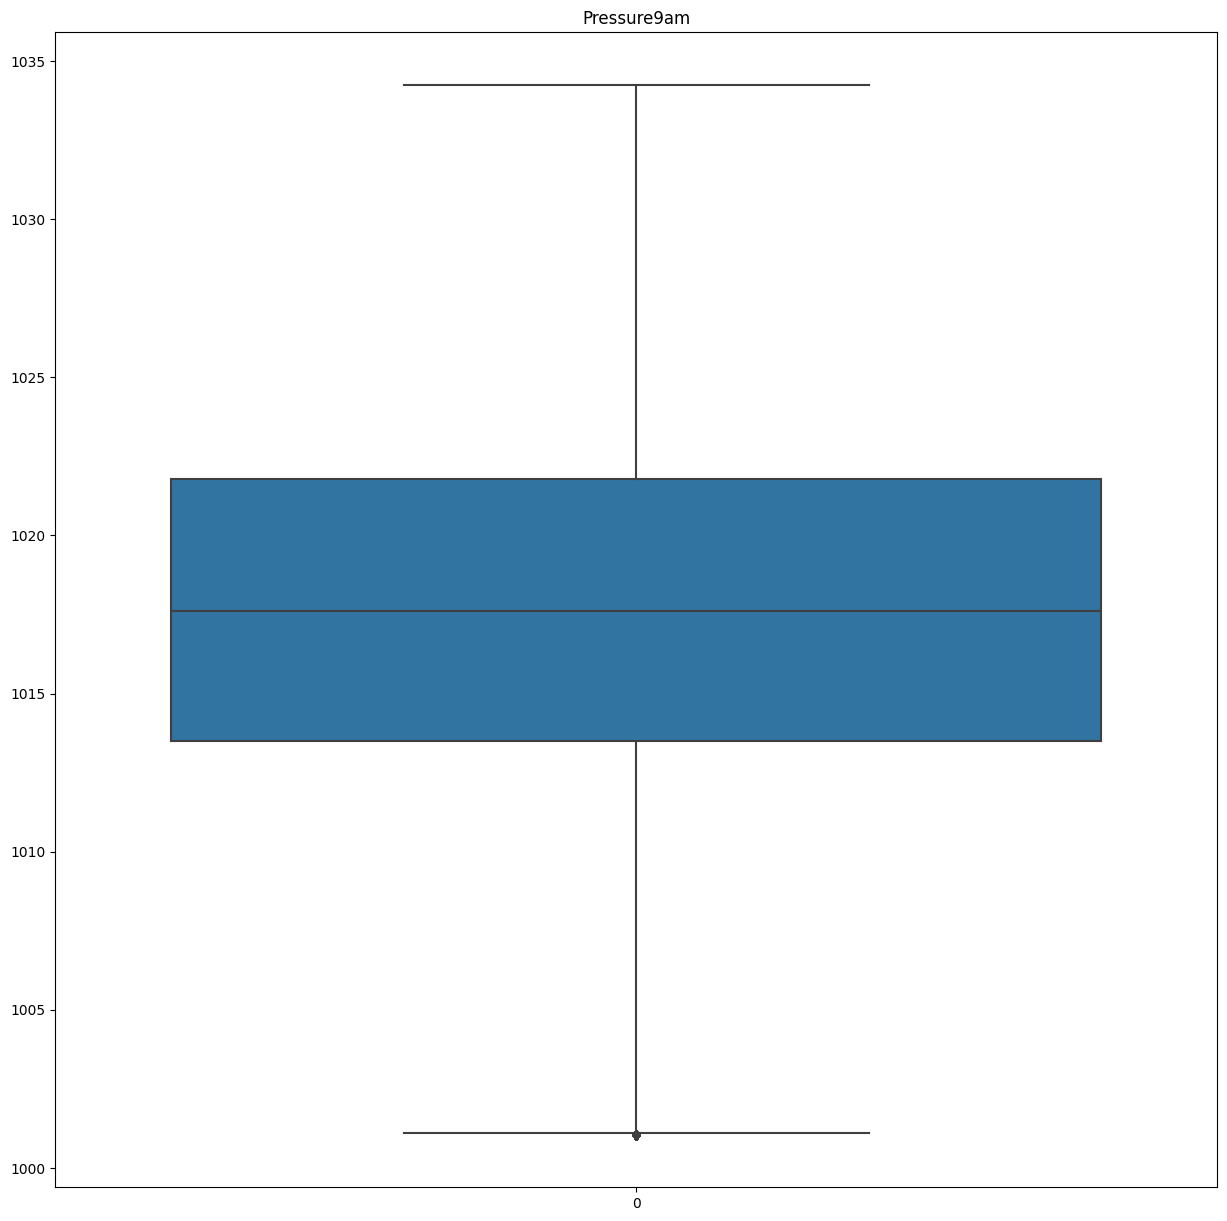

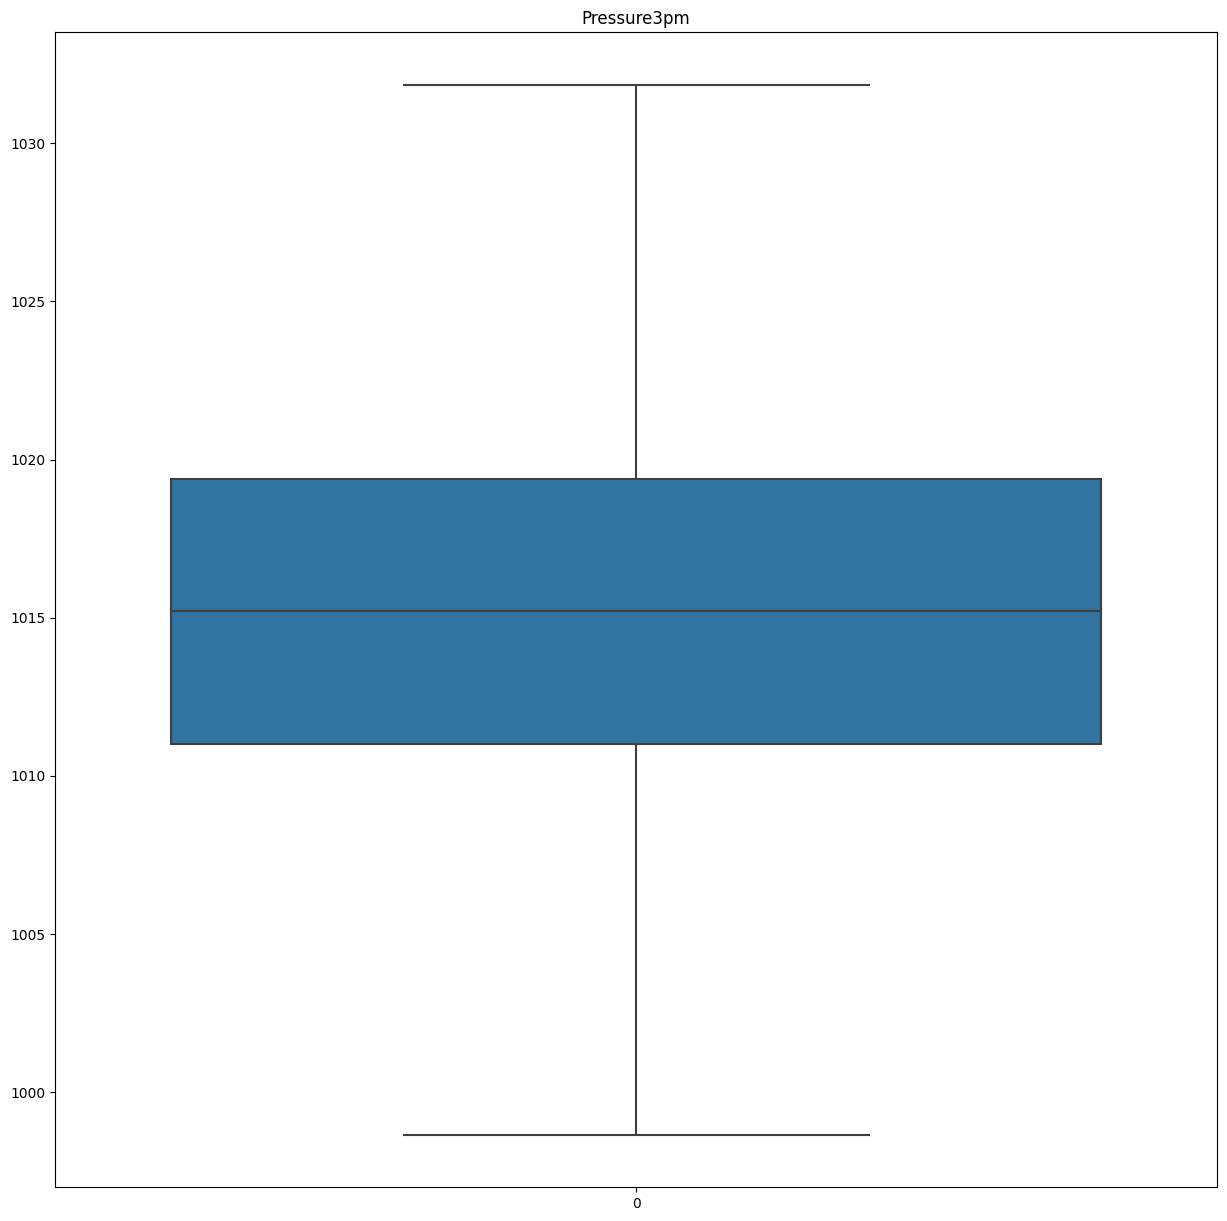

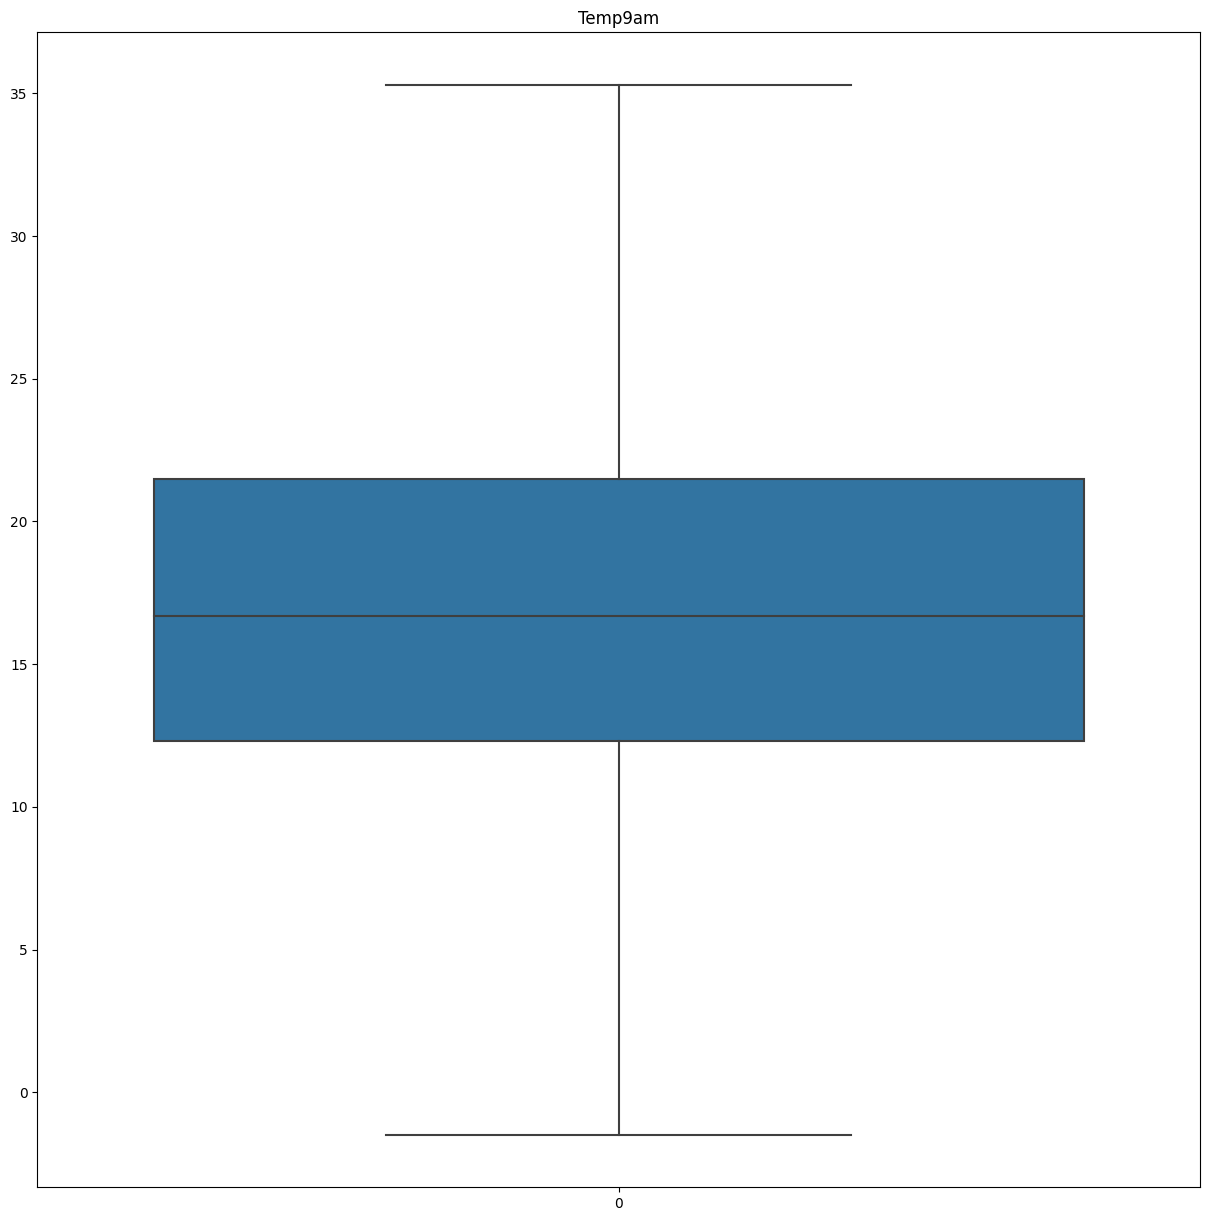

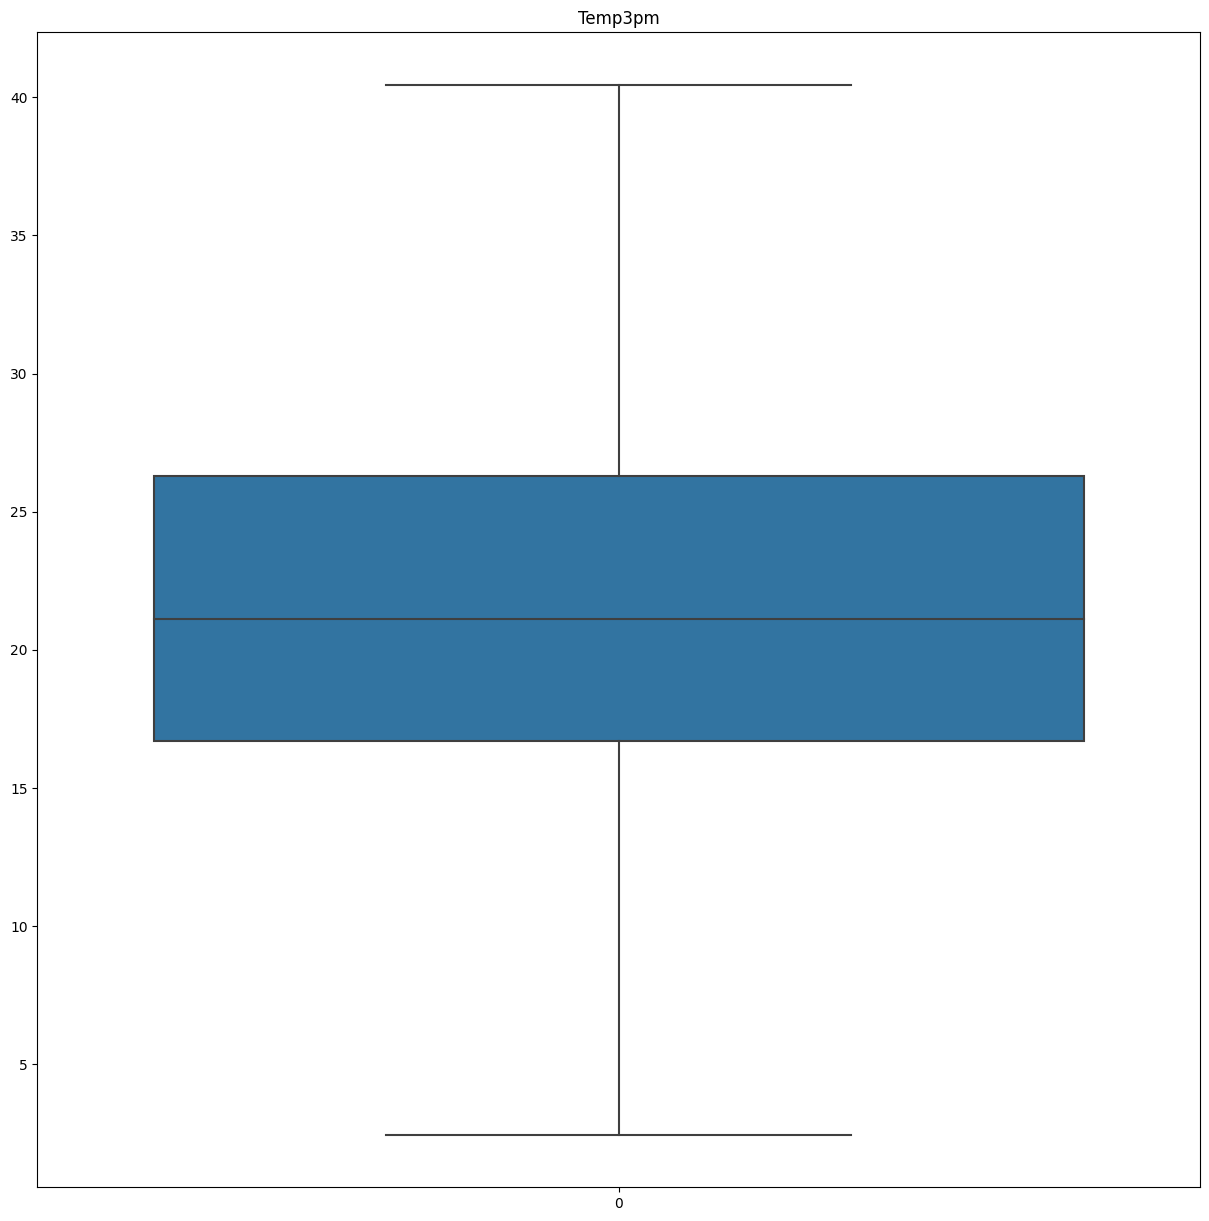

<Figure size 1500x1500 with 0 Axes>

In [46]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))


# MISSING VALUES IMPUTATAION 

In [47]:
#Median Imputation for numeric features
x=df["MinTemp"].median()
df["MinTemp"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\2726050531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MinTemp"].fillna(x, inplace=True)


In [48]:
x=df["MaxTemp"].median()
df["MaxTemp"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\3271873393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MaxTemp"].fillna(x, inplace=True)


In [49]:
x=df["Rainfall"].median()
df["Rainfall"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\2458305827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rainfall"].fillna(x, inplace=True)


In [50]:
x=df["WindGustSpeed"].median()
df["WindGustSpeed"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\417583570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WindGustSpeed"].fillna(x, inplace=True)


In [51]:
x=df["WindSpeed9am"].median()
df["WindSpeed9am"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\2074086510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WindSpeed9am"].fillna(x, inplace=True)


In [52]:
x=df["WindSpeed3pm"].median()
df["WindSpeed3pm"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\2159411028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WindSpeed3pm"].fillna(x, inplace=True)


In [53]:
x=df["Humidity9am"].median()
df["Humidity9am"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\4124739920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Humidity9am"].fillna(x, inplace=True)


In [54]:
x=df["Humidity3pm"].median()
df["Humidity3pm"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\132675660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Humidity3pm"].fillna(x, inplace=True)


In [55]:
x=df["Pressure3pm"].median()
df["Pressure3pm"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\2250607353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pressure3pm"].fillna(x, inplace=True)


In [56]:
x=df["Pressure9am"].median()
df["Pressure9am"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\788835679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pressure9am"].fillna(x, inplace=True)


In [57]:
x=df["Temp9am"].median()
df["Temp9am"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\2857532030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Temp9am"].fillna(x, inplace=True)


In [58]:
x=df["Temp3pm"].median()
df["Temp3pm"].fillna(x, inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\1866378292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Temp3pm"].fillna(x, inplace=True)


In [59]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [60]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.2,3.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.4,6.1,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.8,9.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.4,12.2,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,6.6,1.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,14.6,6.6,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.0,11.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,8.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,6.7,2.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,7.0,0.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.6,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.0,8.0,12.5,26.1,No,No


<AxesSubplot: >

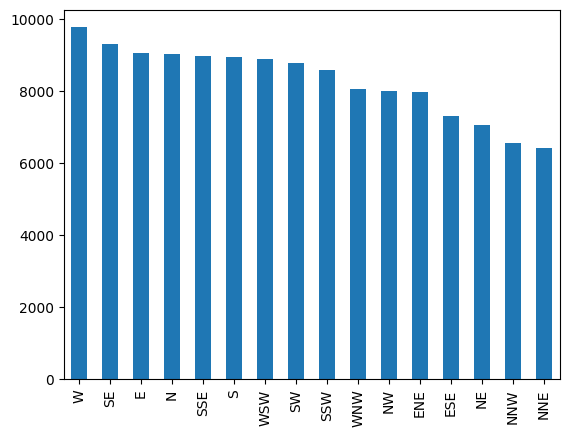

In [61]:
# Frequent Category imputation- One of the most common ways of handling missing values in a categroical
# column is to replace the missing values with the most frequently occuring values i.e. mode of the column
import matplotlib.pyplot as plt
df.WindGustDir.value_counts().sort_values(ascending=False).plot.bar()

In [62]:
df.WindGustDir.fillna('W', inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\1942661023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WindGustDir.fillna('W', inplace=True)


<AxesSubplot: >

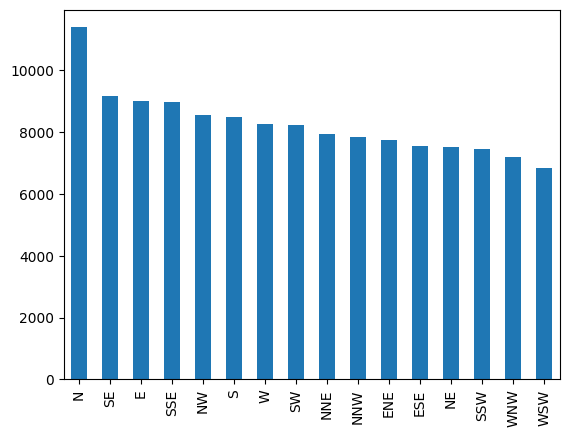

In [63]:
df.WindDir9am.value_counts().sort_values(ascending=False).plot.bar()

In [64]:
df.WindDir9am.fillna('N', inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\1178867012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WindDir9am.fillna('N', inplace=True)


<AxesSubplot: >

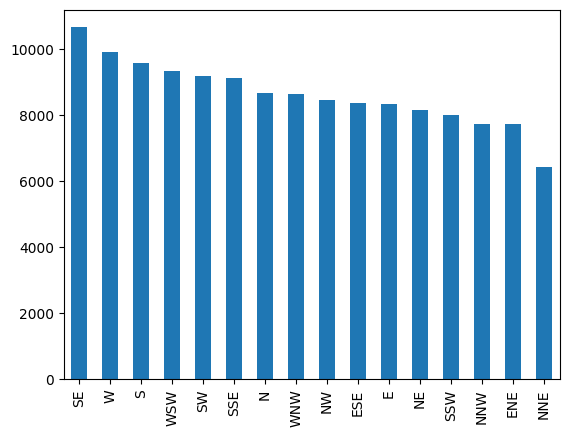

In [65]:
df.WindDir3pm.value_counts().sort_values(ascending=False).plot.bar()

In [66]:
df.WindDir3pm.fillna('SE', inplace=True)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\1878003204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WindDir3pm.fillna('SE', inplace=True)


In [67]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        1406
RainTomorrow        0
dtype: int64

<AxesSubplot: >

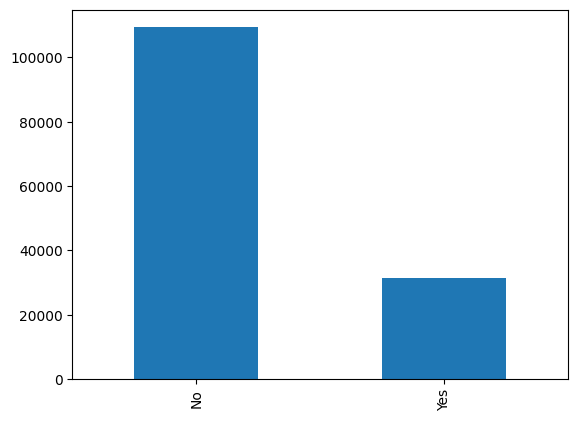

In [68]:
df.RainToday.value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot: >

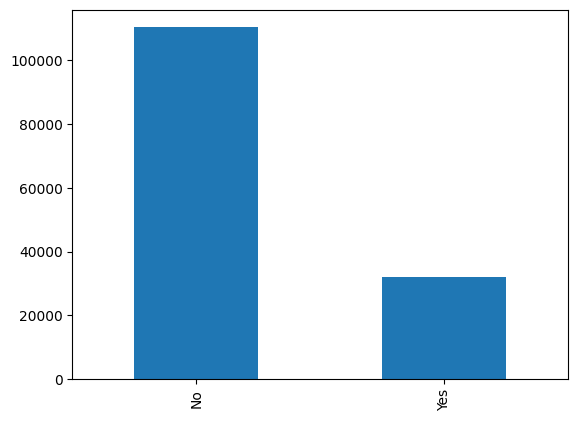

In [69]:
df.RainTomorrow.value_counts().sort_values(ascending=False).plot.bar()

In [70]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        1406
RainTomorrow        0
dtype: int64

In [71]:
df2 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df2

RainTomorrow,No,Yes
Location,,
Adelaide,2402,688
Albany,2114,902
Albury,2393,618
AliceSprings,2787,244
BadgerysCreek,2345,583
Ballarat,2247,781
Bendigo,2472,562
Brisbane,2452,709
Cairns,2038,950


# CORRELATION PLOT

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\2989749156.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


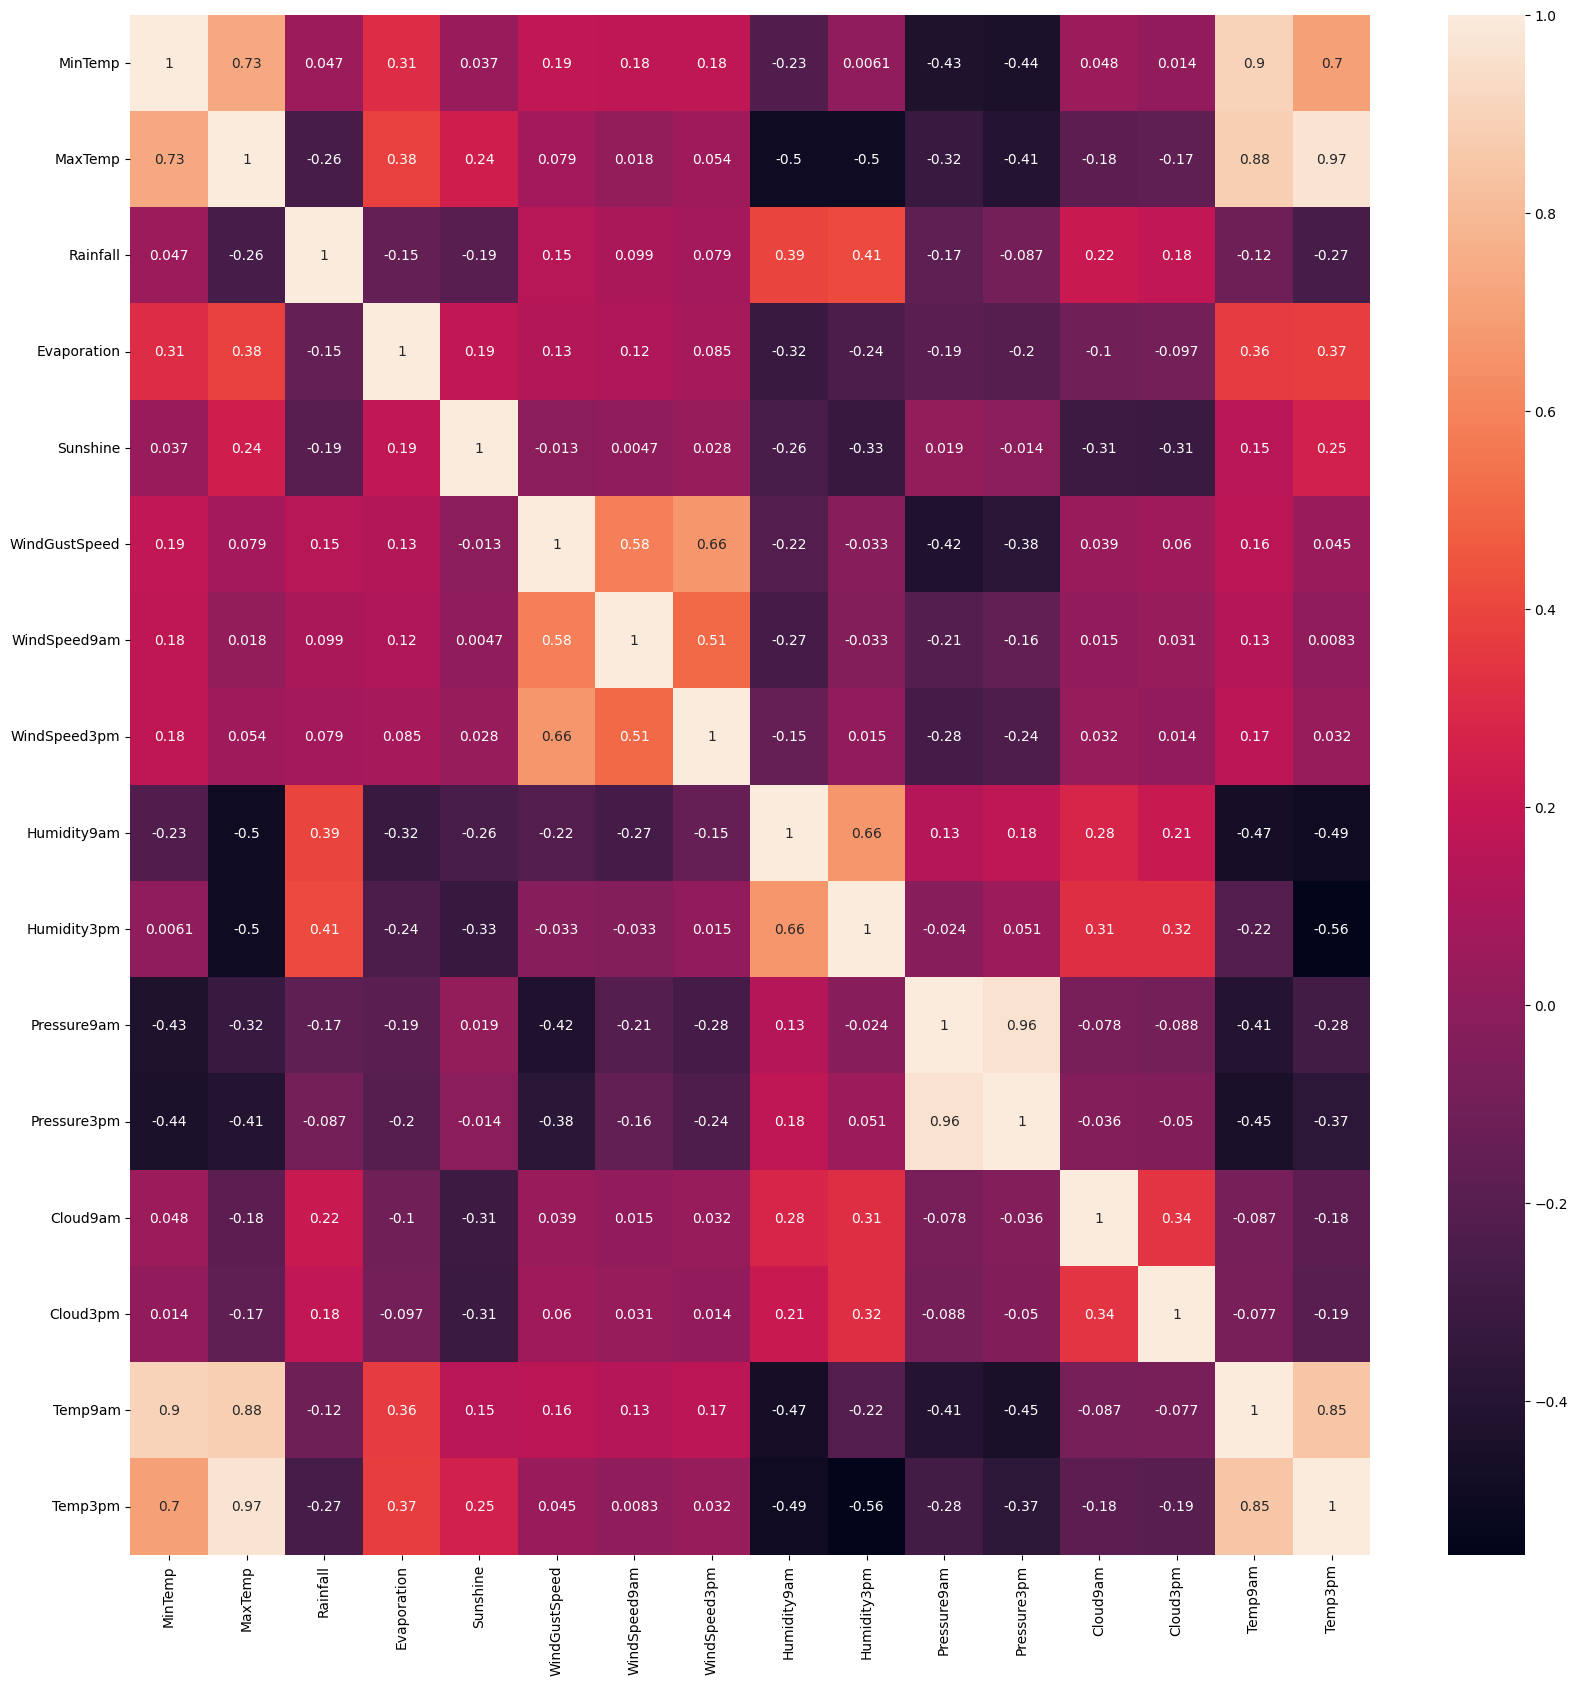

In [72]:
import seaborn as sns
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [73]:
#df.to_csv("categorical_preprocessed_weather.csv", index=False)

# CONVERTING ALL FEATURE INTO NUMERICAL DATA

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['Location']=le.fit_transform(df['Location'])
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\4096309843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindGustDir']=le.fit_transform(df['WindGustDir'])
C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\4096309843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindDir9am']=le.fit_transform(df['WindDir9am'])
C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\4096309843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [75]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,6.2,3.3,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,0.4,6.1,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,1.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.8,9.7,15,46.0,13,...,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,1.4,12.2,4,24.0,9,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,6.6,1.0,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,41,3.5,21.8,0.0,14.6,6.6,0,31.0,2,...,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0,0
145455,2017-06-21,41,2.8,23.4,0.0,1.0,11.4,0,31.0,9,...,51.0,24.0,1024.6,1020.3,1.0,8.0,10.1,22.4,0,0
145456,2017-06-22,41,3.6,25.3,0.0,6.7,2.4,6,22.0,9,...,56.0,21.0,1023.5,1019.1,7.0,0.0,10.9,24.5,0,0
145457,2017-06-23,41,5.4,26.9,0.0,5.6,0.0,3,37.0,9,...,53.0,24.0,1021.0,1016.8,0.0,8.0,12.5,26.1,0,0


In [76]:
#df.to_csv("preprocessed_weather.csv", index=False)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

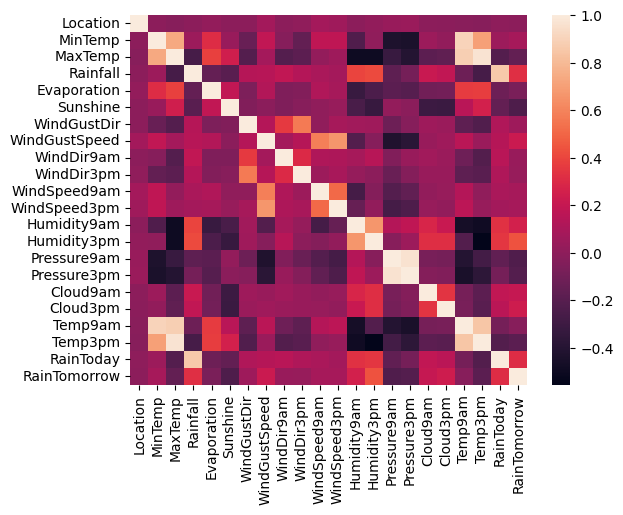

In [77]:
sns.heatmap(df.corr())

In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Location,142193.0,23.740655,14.237503,0.00,11.0,24.0,36.0,48.00
MinTemp,142193.0,12.185846,6.387652,-5.95,7.6,12.0,16.8,30.45
MaxTemp,142193.0,23.228879,7.089938,2.70,17.9,22.6,28.2,43.50
Rainfall,142193.0,0.385441,0.610309,0.00,0.0,0.0,0.6,1.50
Evaporation,142193.0,5.320365,3.416649,0.00,2.6,4.8,7.4,14.60
Sunshine,142193.0,7.626590,3.781062,0.00,4.9,8.5,10.6,14.50
WindGustDir,142193.0,8.059039,4.694267,0.00,4.0,9.0,13.0,15.00
WindGustSpeed,142193.0,39.602786,12.201481,8.50,31.0,39.0,46.0,68.50
WindDir9am,142193.0,7.000316,4.514678,0.00,3.0,7.0,11.0,15.00
WindDir3pm,142193.0,7.788485,4.546322,0.00,4.0,8.0,12.0,15.00


<AxesSubplot: xlabel='RainTomorrow', ylabel='count'>

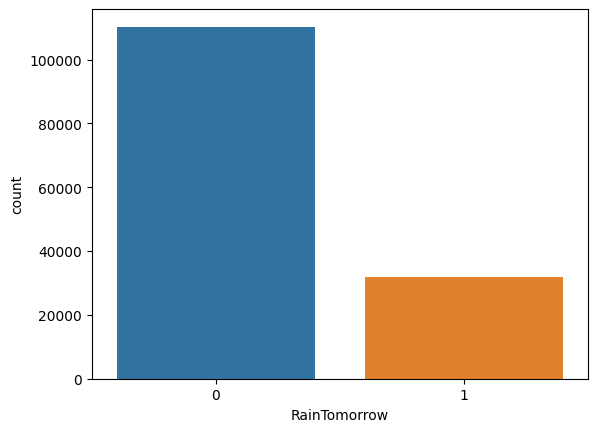

In [79]:
sns.countplot(x='RainTomorrow',data=df)

C:\Users\Adhithiya\AppData\Local\Temp\ipykernel_12072\1523021843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['RainTomorrow'].sort_values().plot(kind='bar')


<AxesSubplot: >

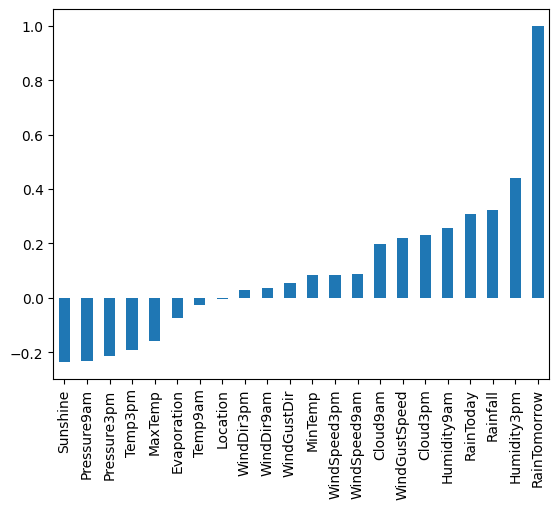

In [80]:
df.corr()['RainTomorrow'].sort_values().plot(kind='bar')

# MODEL IMPLEMENTATION

In [81]:
df=df.drop(['Date'],axis=1)
X = df.drop('RainTomorrow',axis=1).values
y = df['RainTomorrow'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [82]:
#Scaling of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [83]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
accuracy=dict()

In [85]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

C:\Users\Adhithiya\scoop\apps\miniconda3\current\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     30158
           1       0.48      0.71      0.58      5391

    accuracy                           0.84     35549
   macro avg       0.71      0.79      0.74     35549
weighted avg       0.87      0.84      0.85     35549

[[26028  4130]
 [ 1539  3852]]


In [91]:
from sklearn.metrics import accuracy_score
accuracy['Logistic Regression']=accuracy_score(pred,y_test)

# K-nearest Neighbours

In [225]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [226]:
knn.score(X_train,y_train)

1.0

In [227]:
#For K=2
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [228]:
knn.score(X_train,y_train)

0.8862008176737557

In [229]:
#find the best K value
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

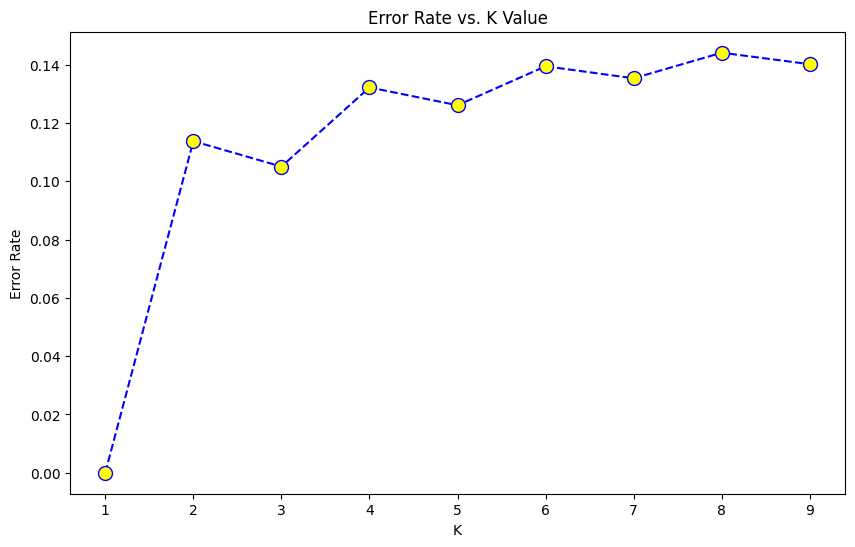

In [230]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate differs as the k value increases

In [231]:
#for k=2 is best suitable
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     32056
           1       0.30      0.70      0.42      3493

    accuracy                           0.81     35549
   macro avg       0.63      0.76      0.66     35549
weighted avg       0.90      0.81      0.84     35549

[[26508  5548]
 [ 1059  2434]]


In [232]:
accuracy['KNN']=accuracy_score(pred,y_test)

# Naive Bayes

In [233]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     25780
           1       0.63      0.52      0.57      9769

    accuracy                           0.78     35549
   macro avg       0.73      0.70      0.71     35549
weighted avg       0.77      0.78      0.78     35549

[[22847  2933]
 [ 4720  5049]]


In [234]:
accuracy['Naive Bayes']=accuracy_score(pred,y_test)

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     27649
           1       0.52      0.53      0.52      7900

    accuracy                           0.79     35549
   macro avg       0.69      0.69      0.69     35549
weighted avg       0.79      0.79      0.79     35549

[[23821  3828]
 [ 3746  4154]]


In [93]:
accuracy['Decision Tree']=accuracy_score(pred,y_test)

# Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     27567
           1       0.74      0.45      0.56      7982

    accuracy                           0.84     35549
   macro avg       0.80      0.70      0.73     35549
weighted avg       0.83      0.84      0.83     35549

[[26303  1264]
 [ 4351  3631]]


In [238]:
#find the best tree value
error_rate = []

for i in range(1,10):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

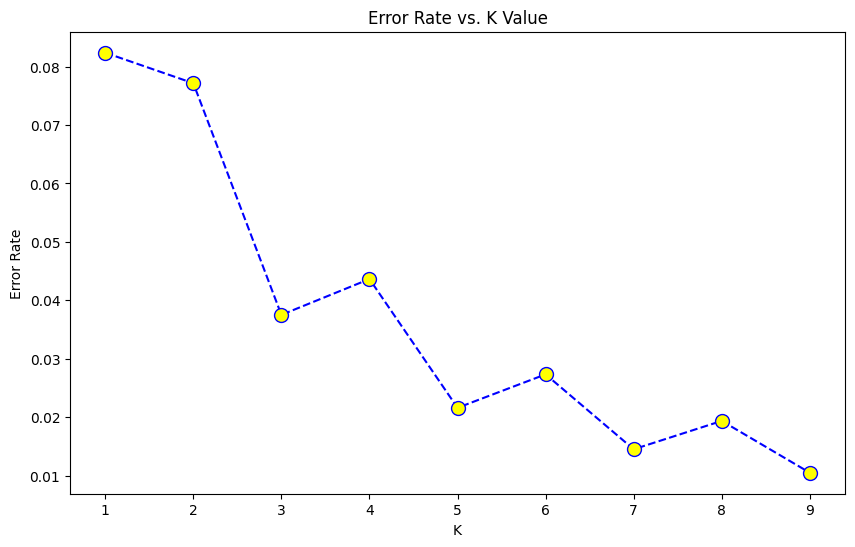

In [239]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate decrease as the tree value increases

In [240]:
rfc = RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     27567
           1       0.76      0.49      0.59      7982

    accuracy                           0.85     35549
   macro avg       0.81      0.72      0.75     35549
weighted avg       0.84      0.85      0.84     35549

[[26317  1250]
 [ 4108  3874]]


In [241]:
accuracy['Random Forest Classifier']=accuracy_score(predictions,y_test)

# Adaboost

In [242]:
from sklearn.ensemble import AdaBoostClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0) #lowest accuracy score
abc=AdaBoostClassifier(n_estimators=100,learning_rate=1,base_estimator=clf)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     27554
           1       0.52      0.52      0.52      7995

    accuracy                           0.79     35549
   macro avg       0.69      0.69      0.69     35549
weighted avg       0.79      0.79      0.79     35549

[[23750  3804]
 [ 3817  4178]]


In [243]:
accuracy['AdaBoosting']=accuracy_score(y_pred,y_test)

# Bagging classifier

In [94]:
from sklearn.ensemble import BaggingClassifier
cart=DecisionTreeClassifier()
num_trees=100
bagmodel=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=7)
bagmodel.fit(X_train,y_train)
y_pred=bagmodel.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     27567
           1       0.75      0.51      0.61      7982

    accuracy                           0.85     35549
   macro avg       0.81      0.73      0.76     35549
weighted avg       0.84      0.85      0.84     35549

[[26169  1398]
 [ 3891  4091]]


In [95]:
accuracy['Bagging']=accuracy_score(y_pred,y_test)

In [246]:
accuracy

{'Logistic Regression': 0.840304931221694,
 'KNN': 0.8141438577737771,
 'Naive Bayes': 0.7847196826914963,
 'Decision Tree': 0.7854229373540746,
 'Random Forest Classifier': 0.8492784607161945,
 'AdaBoosting': 0.7856198486595967,
 'Bagging': 0.8515851360094517}

# Creating the Model

## For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [247]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [248]:
X_train.shape

(106644, 21)

In [252]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [253]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/50
3333/3333 [==============================] - 6s 2ms/step - loss: 0.3813 - val_loss: 0.3682
Epoch 2/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3642 - val_loss: 0.3621
Epoch 3/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3597 - val_loss: 0.3685
Epoch 4/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3568 - val_loss: 0.3605
Epoch 5/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3560 - val_loss: 0.3603
Epoch 6/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3546 - val_loss: 0.3546
Epoch 7/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3535 - val_loss: 0.3875
Epoch 8/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3533 - val_loss: 0.3536
Epoch 9/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3518 - val_loss: 0.3547
Epoch 10/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.351

In [254]:
l=list(model.history.history['val_loss'])
print("The maximum validation loss is ",max(l),"\nThe minimum validation loss is",min(l))

The maximum validation loss is  0.38753941655158997 
The minimum validation loss is 0.3476448357105255


In [255]:
model_loss = pd.DataFrame(model.history.history)

In [256]:
model_loss.head()

,loss,val_loss
0,0.381304,0.368206
1,0.364157,0.362116
2,0.359737,0.368478
3,0.356822,0.360546
4,0.355992,0.360260


<AxesSubplot: >

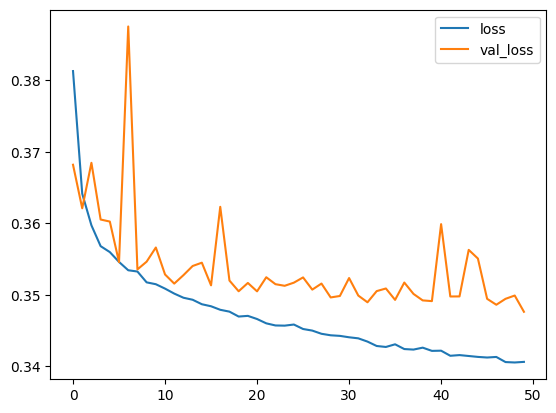

In [257]:
model_loss.plot()

In [258]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [259]:
from tensorflow.keras.callbacks import EarlyStopping

In [260]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [261]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3856 - val_loss: 0.3692
Epoch 2/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3645 - val_loss: 0.3624
Epoch 3/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3593 - val_loss: 0.3581
Epoch 4/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3566 - val_loss: 0.3591
Epoch 5/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3549 - val_loss: 0.3631
Epoch 6/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3535 - val_loss: 0.3581
Epoch 7/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3529 - val_loss: 0.3646
Epoch 8/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3525 - val_loss: 0.3545
Epoch 9/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.3528 - val_loss: 0.3551
Epoch 10/50
3333/3333 [==============================] - 4s 1ms/step - loss: 0.351

<AxesSubplot: >

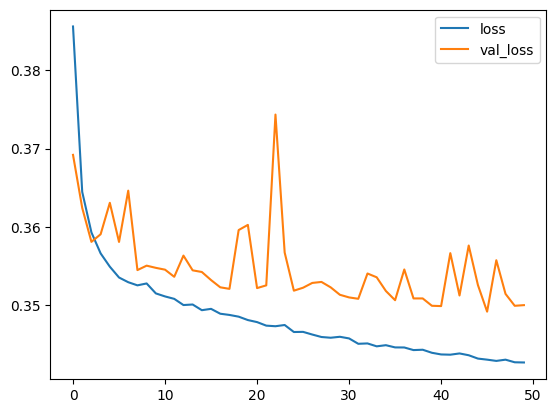

In [262]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [263]:
from tensorflow.keras.layers import Dropout

In [264]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [265]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.4374 - val_loss: 0.3815
Epoch 2/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.4002 - val_loss: 0.3787
Epoch 3/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3943 - val_loss: 0.3721
Epoch 4/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3924 - val_loss: 0.3706
Epoch 5/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3907 - val_loss: 0.3671
Epoch 6/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3888 - val_loss: 0.3655
Epoch 7/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3877 - val_loss: 0.3664
Epoch 8/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3869 - val_loss: 0.3668
Epoch 9/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.3857 - val_loss: 0.3640
Epoch 10/50
3333/3333 [==============================] - 5s 1ms/step - loss: 0.385

<AxesSubplot: >

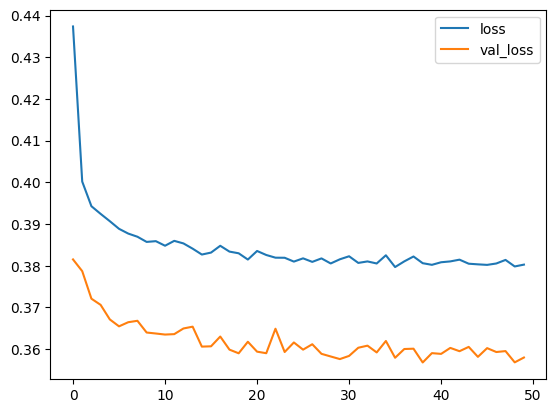

In [266]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [267]:
predictions=(model.predict(X_test) > 0.5).astype("int32")

1111/1111 [==============================] - 1s 816us/step


In [268]:
from sklearn.metrics import classification_report,confusion_matrix

In [269]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     27567
           1       0.75      0.46      0.57      7982

    accuracy                           0.84     35549
   macro avg       0.81      0.71      0.74     35549
weighted avg       0.83      0.84      0.83     35549



In [270]:
print(confusion_matrix(y_test,predictions))

[[26366  1201]
 [ 4338  3644]]


In [271]:
accuracy['ANN']=accuracy_score(y_test,predictions)

In [272]:
accuracy

{'Logistic Regression': 0.840304931221694,
 'KNN': 0.8141438577737771,
 'Naive Bayes': 0.7847196826914963,
 'Decision Tree': 0.7854229373540746,
 'Random Forest Classifier': 0.8492784607161945,
 'AdaBoosting': 0.7856198486595967,
 'Bagging': 0.8515851360094517,
 'ANN': 0.8441868969591269}

In [273]:
color=['blue','black','yellow','green','red','pink','violet','gold']

<BarContainer object of 8 artists>

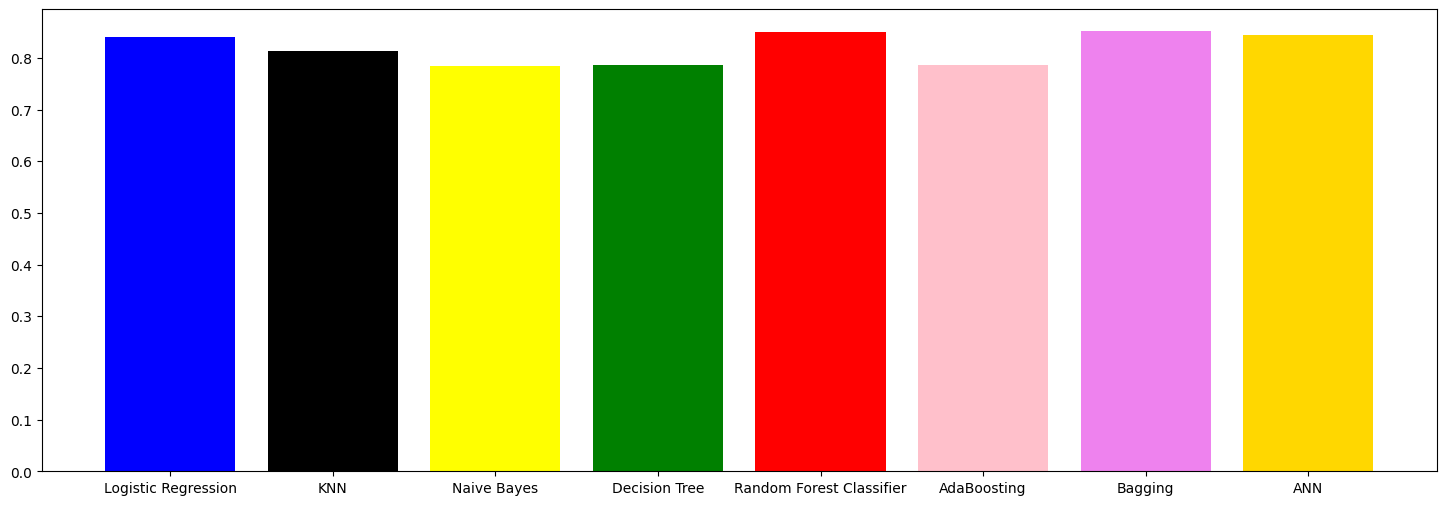

In [274]:
plt.figure(figsize=(18,6))
plt.bar(x=accuracy.keys(),height=accuracy.values(),color=color)

In [97]:
# save the model to disk
import pickle
filename = 'WeatherPrediction.sav'
pickle.dump(bagmodel, open(filename, 'wb'))